<a href="https://colab.research.google.com/github/asutoshpaluri20-droid/Asutosh_INFO5731_Fall2025/blob/main/Paluri_Asutosh_Assignment_04_CLEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 75.6 MB/s eta 0:00:00


In [ ]:
import random
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from gensim import corpora, models
from gensim.models import LdaModel, LsiModel
from gensim.models.coherencemodel import CoherenceModel

# First we load the Dataset

def load_20ng_sample(n_docs=2000, random_state=42):
    data = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))
    random.seed(random_state)
    idx = random.sample(range(len(data.data)), n_docs)
    texts = [data.data[i] for i in idx]
    return texts

In [ ]:
# Secondly we preprocess the dataset to remove unecessary things

STOPWORDS = set(ENGLISH_STOP_WORDS)

def simple_preprocess(doc):
    # lowercase, keep only letters, split on whitespace
    doc = doc.lower()
    doc = re.sub(r"[^a-z\s]", " ", doc)
    tokens = [w for w in doc.split() if len(w) > 2 and w not in STOPWORDS]
    return tokens


def build_corpus(texts):
    tokenized_docs = [simple_preprocess(d) for d in texts]
    dictionary = corpora.Dictionary(tokenized_docs)
    # filter rare and too-common words
    dictionary.filter_extremes(no_below=5, no_above=0.5)
    corpus = [dictionary.doc2bow(t) for t in tokenized_docs]
    return tokenized_docs, dictionary, corpus

In [ ]:
# 3 Computing the coherence for the K

def compute_coherence_for_k(model_type, corpus, tokenized_docs, dictionary, k_values, random_state=42):
    coherence_scores = []

    # TF-IDF for LSA
    tfidf = None
    corpus_tfidf = None
    if model_type == "lsa":
        tfidf = models.TfidfModel(corpus)
        corpus_tfidf = tfidf[corpus]

    for k in k_values:
        if model_type == "lda":
            model = LdaModel(
                corpus=corpus,
                id2word=dictionary,
                num_topics=k,
                random_state=random_state,
                passes=10,
            )
        elif model_type == "lsa":
            model = LsiModel(
                corpus=corpus_tfidf,
                id2word=dictionary,
                num_topics=k
            )
        else:
            raise ValueError("model_type must be 'lda' or 'lsa'")

        coh_model = CoherenceModel(
            model=model,
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence="c_v",
        )
        coherence = coh_model.get_coherence()
        coherence_scores.append(coherence)
        print(f"{model_type.upper()} | K={k}: coherence={coherence:.4f}")

    return coherence_scores


def plot_coherence(k_values, scores, title):
    plt.figure()
    plt.plot(k_values, scores, marker="o")
    plt.xlabel("Number of Topics (K)")
    plt.ylabel("Coherence (c_v)")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 4 Here we visualize the model

def print_topics(model, num_topics, num_words=10, model_name="Model"):
    print(f"\n=== {model_name} Topics ===")
    for t in range(num_topics):
        terms = model.show_topic(t, topn=num_words)
        words = [w for w, _ in terms]
        print(f"Topic {t}: " + ", ".join(words))


def plot_topic_words(model, topic_id, num_words=10, title_prefix=""):
    terms = model.show_topic(topic_id, topn=num_words)
    words = [w for w, wgt in terms]
    weights = [abs(wgt) for _, wgt in terms]  # abs for LSA (can be negative)

    x = np.arange(len(words))
    plt.figure()
    plt.bar(x, weights)
    plt.xticks(x, words, rotation=45, ha="right")
    plt.title(f"{title_prefix}Topic {topic_id}")
    plt.ylabel("Weight")
    plt.tight_layout()
    plt.show()

Loaded 2000 documents from 20 Newsgroups.
Vocabulary size: 4592

Computing coherence for LDA...
LDA | K=2: coherence=0.5807
LDA | K=5: coherence=0.5064
LDA | K=10: coherence=0.5301
LDA | K=15: coherence=0.4840
LDA | K=20: coherence=0.4813

Computing coherence for LSA...
LSA | K=2: coherence=0.5441
LSA | K=5: coherence=0.4987
LSA | K=10: coherence=0.4250
LSA | K=15: coherence=0.3974
LSA | K=20: coherence=0.3595


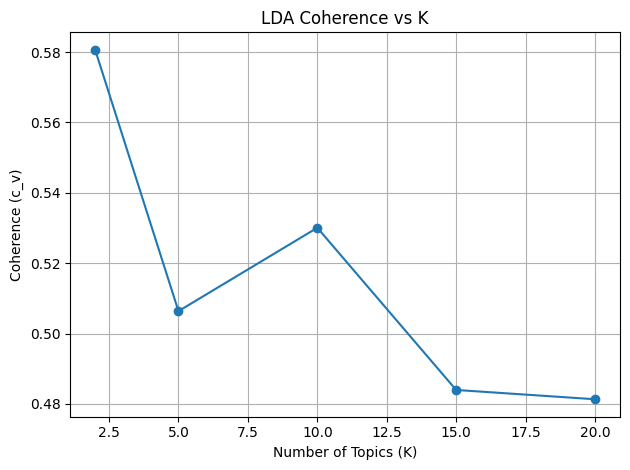

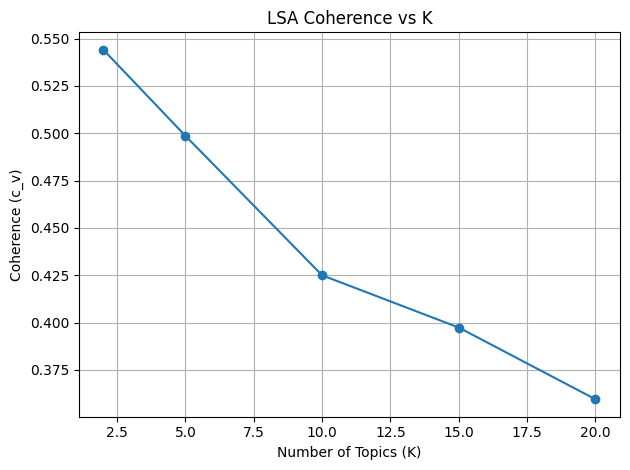


Best K (LDA) by coherence: 2
Best K (LSA) by coherence: 2

Training final LDA with K=10 (as requested)...
Training final LSA with K=10 (as requested)...

Training LDA with best K=2...
Training LSA with best K=2...

=== LDA (K=10) Topics ===
Topic 0: edu, ftp, key, available, data, use, pub, des, server, free
Topic 1: just, like, don, know, people, think, car, good, thing, time
Topic 2: said, don, people, says, say, know, like, just, appears, car
Topic 3: dos, used, books, does, homosexuality, new, light, people, power, dead
Topic 4: entry, information, use, does, search, program, file, info, entries, files
Topic 5: game, don, team, year, games, like, think, season, good, play
Topic 6: space, administration, russia, think, government, russian, president, program, official, money
Topic 7: president, think, don, know, people, said, going, government, encryption, law
Topic 8: windows, use, edu, data, just, new, file, know, thanks, card
Topic 9: god, people, jesus, know, christ, don, like,

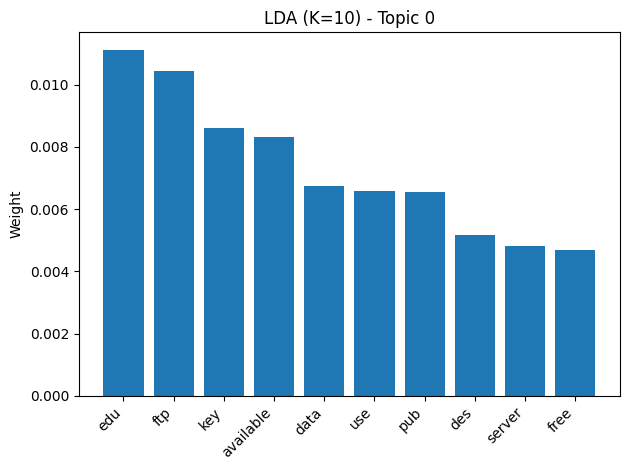

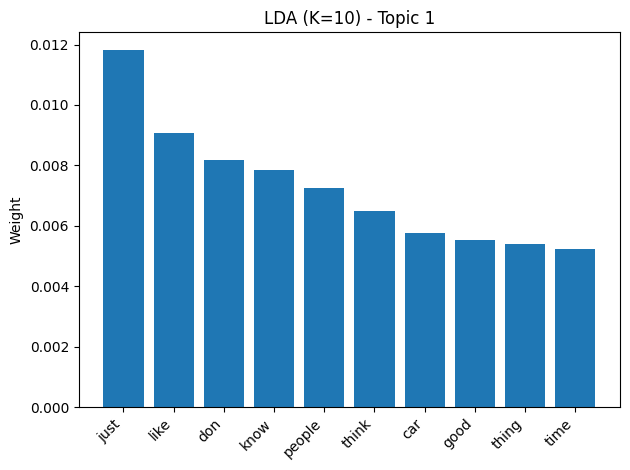

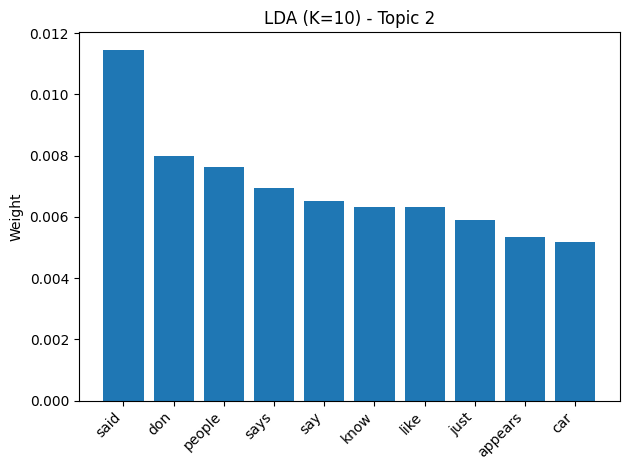

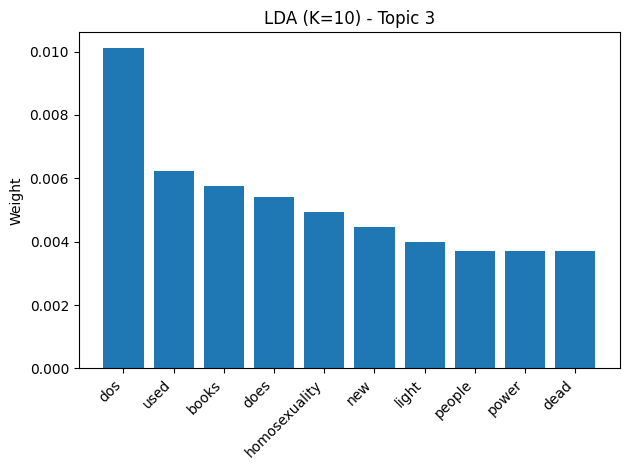

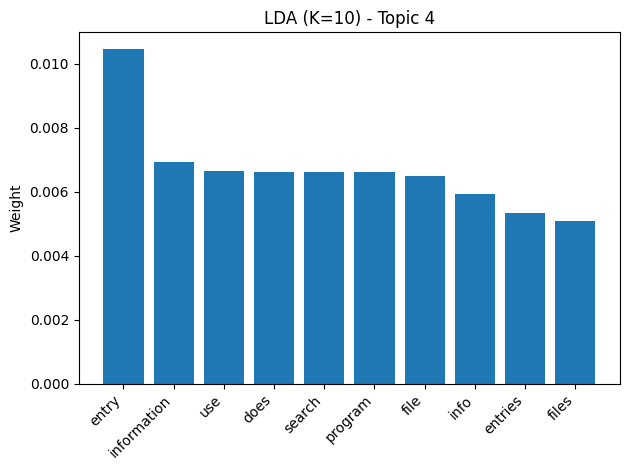

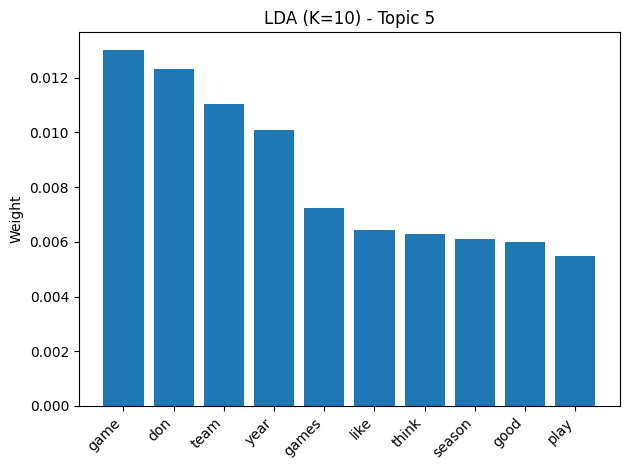

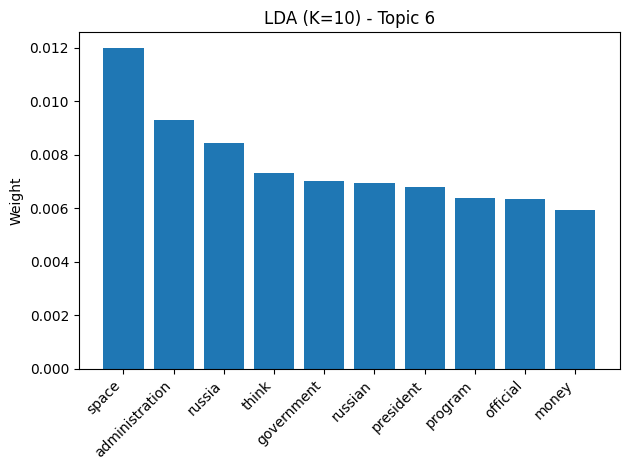

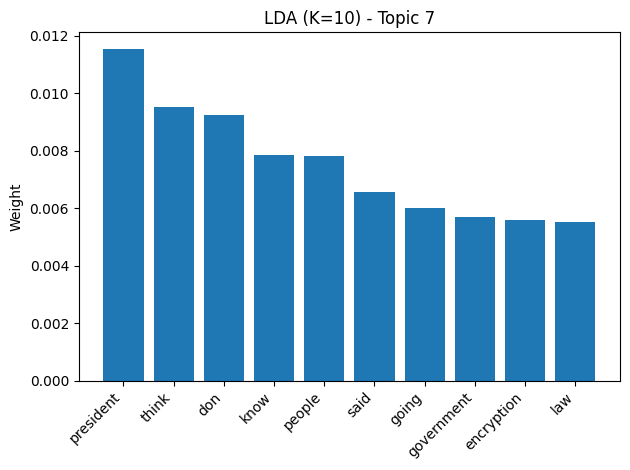

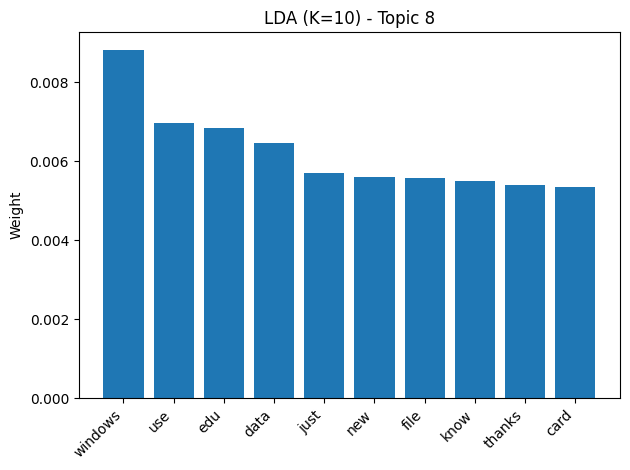

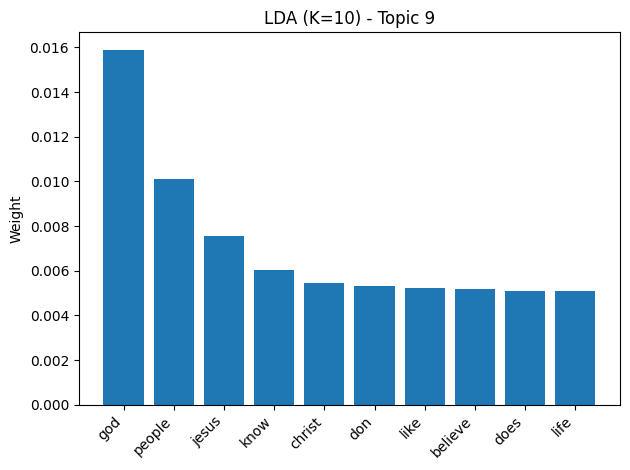

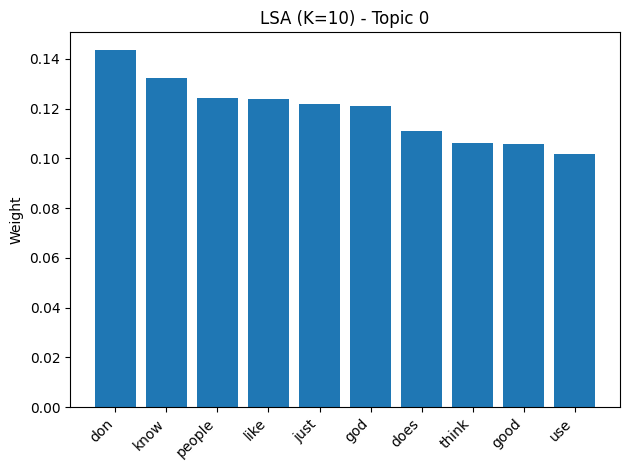

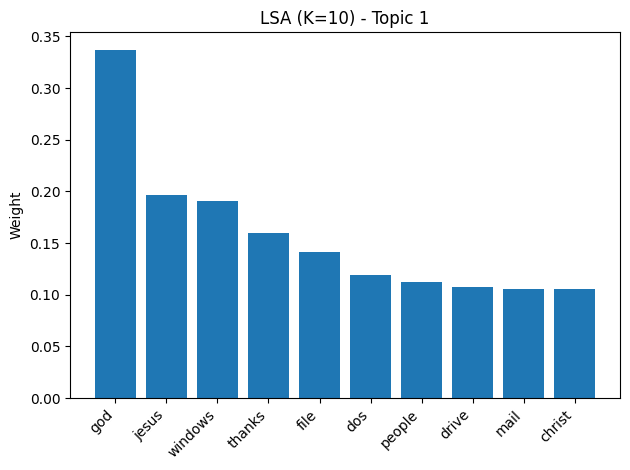

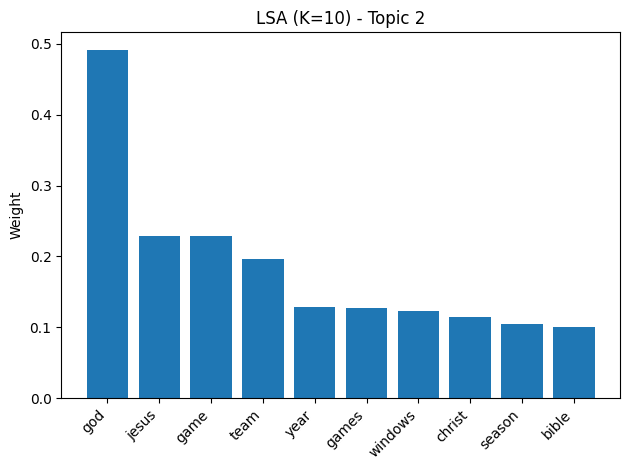

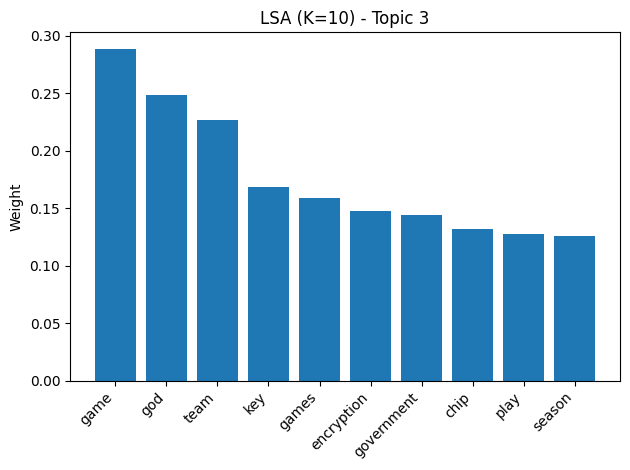

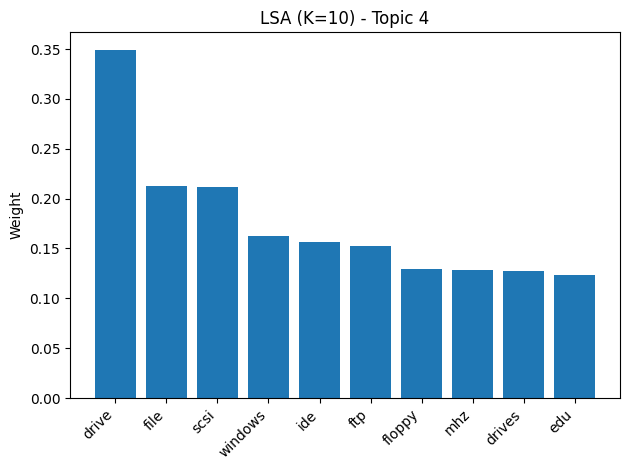

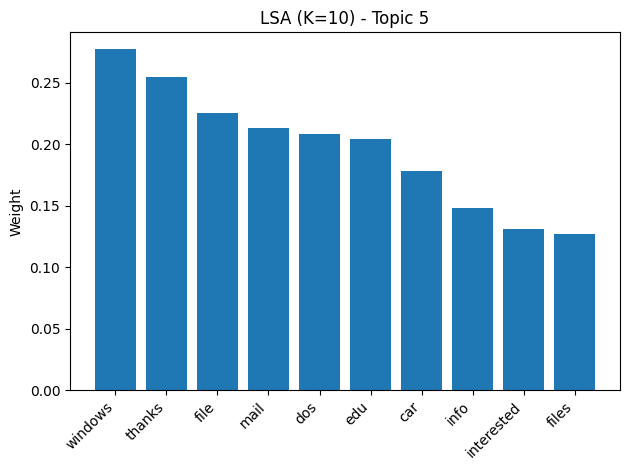

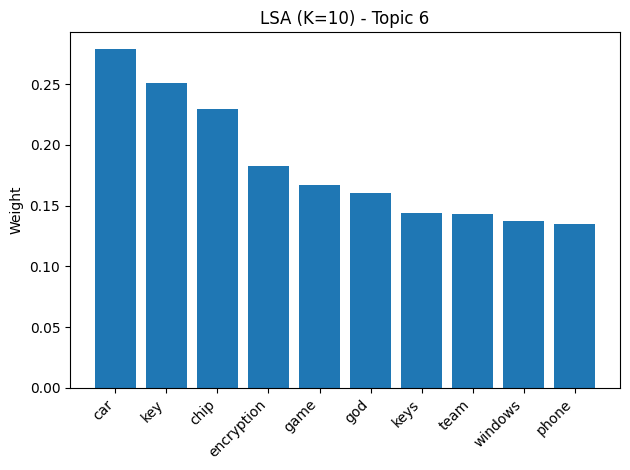

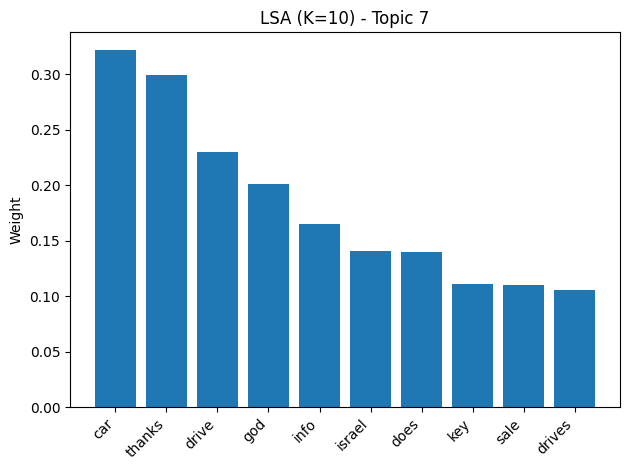

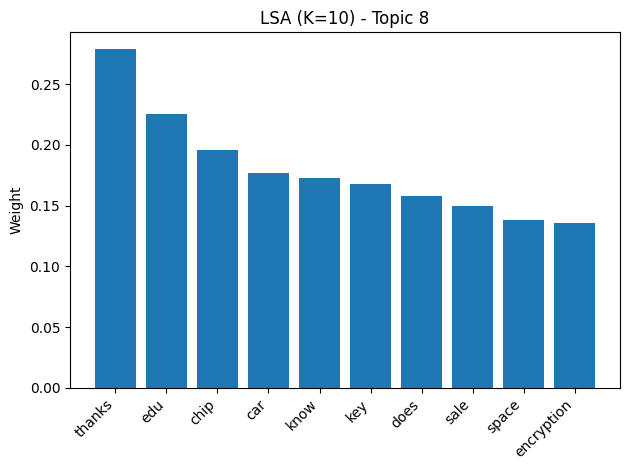

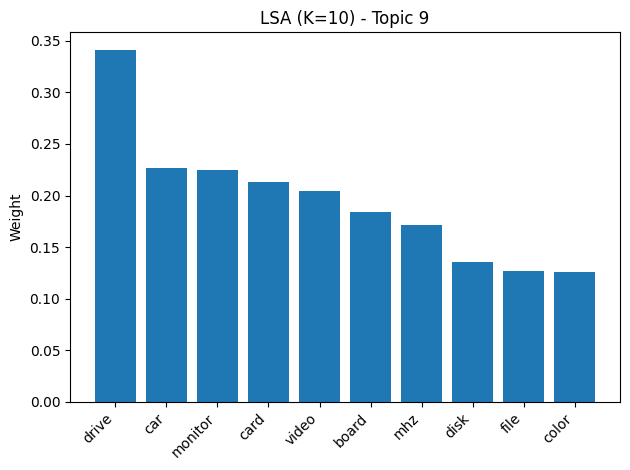

In [ ]:
def main():
    # Step 1: Load random 2000 docs
    texts = load_20ng_sample(n_docs=2000, random_state=42)
    print("Loaded 2000 documents from 20 Newsgroups.")

    # Step 2: Preprocess + build corpus
    tokenized_docs, dictionary, corpus = build_corpus(texts)
    print(f"Vocabulary size: {len(dictionary)}")

    # Step 3: Choose K values and compute coherence for LDA and LSA
    k_values = [2, 5, 10, 15, 20]

    print("\nComputing coherence for LDA...")
    lda_coh = compute_coherence_for_k(
        "lda", corpus, tokenized_docs, dictionary, k_values
    )

    print("\nComputing coherence for LSA...")
    lsa_coh = compute_coherence_for_k(
        "lsa", corpus, tokenized_docs, dictionary, k_values
    )

    # Step 4: Plot coherence vs K
    plot_coherence(k_values, lda_coh, "LDA Coherence vs K")
    plot_coherence(k_values, lsa_coh, "LSA Coherence vs K")

    # Step 5: Find best K by coherence
    best_k_lda = k_values[int(np.argmax(lda_coh))]
    best_k_lsa = k_values[int(np.argmax(lsa_coh))]
    print(f"\nBest K (LDA) by coherence: {best_k_lda}")
    print(f"Best K (LSA) by coherence: {best_k_lsa}")

    # Step 6: Train final models
    print("\nTraining final LDA with K=10 (as requested)...")
    lda_10 = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=10,
        random_state=42,
        passes=10,
    )

    print("Training final LSA with K=10 (as requested)...")
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    lsa_10 = LsiModel(
        corpus=corpus_tfidf,
        id2word=dictionary,
        num_topics=10,
    )

    # Also train models with best K from coherence
    print(f"\nTraining LDA with best K={best_k_lda}...")
    lda_best = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=best_k_lda,
        random_state=42,
        passes=10,
    )

    print(f"Training LSA with best K={best_k_lsa}...")
    lsa_best = LsiModel(
        corpus=corpus_tfidf,
        id2word=dictionary,
        num_topics=best_k_lsa,
    )

    # Step 7: Print topics (K=10 models)
    print_topics(lda_10, num_topics=10, num_words=10, model_name="LDA (K=10)")
    print_topics(lsa_10, num_topics=10, num_words=10, model_name="LSA (K=10)")

    # Step 8: Visualize each topic as a simple bar plot
    # (You can comment this out if it's too many plots)
    for t in range(10):
        plot_topic_words(lda_10, t, num_words=10, title_prefix="LDA (K=10) - ")

    for t in range(10):
        plot_topic_words(lsa_10, t, num_words=10, title_prefix="LSA (K=10) - ")


if __name__ == "__main__":
    main()


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install bertopic[all] scikit-learn gensim umap-learn hdbscan

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sentence_transformers import SentenceTransformer

import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
newsgroups = fetch_20newsgroups(
    subset="all",
    remove=('headers', 'footers', 'quotes')
)

idx = random.sample(range(len(newsgroups.data)), 2000)
docs = [newsgroups.data[i] for i in idx]
len(docs)


2000

In [ ]:
# 3. Preprocessing the data for optimal coherence

from gensim import corpora # Added import for corpora

stopwords = set(ENGLISH_STOP_WORDS)

def simple_preprocess(doc):
    # lowercase, keep only letters, split on whitespace
    doc = doc.lower()
    doc = re.sub(r"[^a-z\s]", " ", doc)
    tokens = [w for w in doc.split() if len(w) > 2 and w not in stopwords]
    return tokens

texts = [simple_preprocess(d) for d in docs] # Corrected function call
dictionary = corpora.Dictionary(texts)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def coherence_bertopic(topic_model, docs, embed_model, top_n=10):

    topics = topic_model.get_topics()
    topic_ids = [t for t in topics.keys() if t != -1]

    topic_strings = []
    for tid in topic_ids:
        words = [w for w, _ in topics[tid][:top_n]]
        topic_strings.append(" ".join(words))

    # Embed topics
    topic_embs = embed_model.encode(topic_strings)

    # Coherence = average similarity to centroid
    centroid = np.mean(topic_embs, axis=0).reshape(1, -1)
    sims = cosine_similarity(topic_embs, centroid).reshape(-1)

    return sims.mean()


In [ ]:
embed_model = SentenceTransformer("all-MiniLM-L6-v2")

k_values = [5, 8, 10, 12, 15]

models_for_k = {}
coherence_scores = []

for k in k_values:
    print(f"\n=== Training BERTopic (K={k}) ===")

    topic_model_k = BERTopic(
        nr_topics=k,
        verbose=False
    )

    topic_model_k.fit_transform(docs)

    # NEW coherence (never errors)
    coh = coherence_bertopic(topic_model_k, docs, embed_model)

    coherence_scores.append(coh)
    models_for_k[k] = topic_model_k

    print(f"K={k} → Coherence: {coh:.4f}")




=== Training BERTopic (K=5) ===
K=5 → Coherence: 0.6885

=== Training BERTopic (K=8) ===
K=8 → Coherence: 0.6586

=== Training BERTopic (K=10) ===
K=10 → Coherence: 0.7406

=== Training BERTopic (K=12) ===
K=12 → Coherence: 0.6384

=== Training BERTopic (K=15) ===
K=15 → Coherence: 0.5712


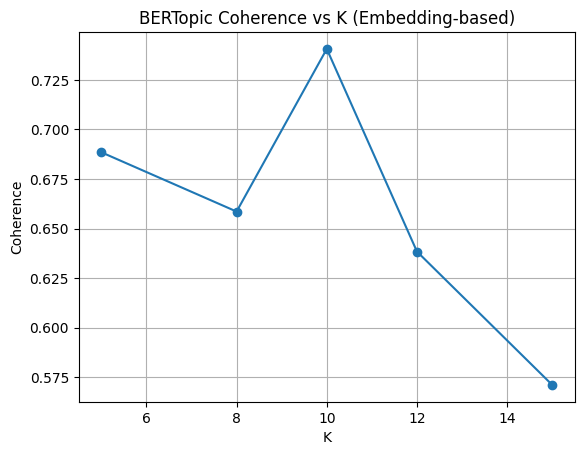

10

In [ ]:
plt.plot(k_values, coherence_scores, marker='o')
plt.title("BERTopic Coherence vs K (Embedding-based)")
plt.xlabel("K")
plt.ylabel("Coherence")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(coherence_scores)]
best_k


In [ ]:
topic_model_10 = models_for_k[10]
topic_info_10 = topic_model_10.get_topic_info()
topic_info_10


,Topic,Count,Name,Representation,Representative_Docs
0,-1,420,-1_the_to_of_and,"[the, to, of, and, maxaxaxaxaxaxaxaxaxaxaxaxax...","[As promised, below is a personal critique of ..."
1,0,365,0_the_to_and_is,"[the, to, and, is, it, of, for, in, on, with]","[HI,\n that might look like a dull request, bu..."
2,1,266,1_the_to_of_and,"[the, to, of, and, is, in, that, it, for, on]","[In the April edition of ""One Small Step for a..."
3,2,231,2_the_of_to_and,"[the, of, to, and, in, that, is, you, it, for]",[Accounts of Anti-Armenian Human Right Violati...
4,3,202,3_the_to_he_and,"[the, to, he, and, 25, in, of, that, was, on]",[Since I was the one responsible for these div...
5,4,164,4_the_of_that_to,"[the, of, that, to, is, and, in, it, not, are]",[\n[ -and many others mailed me. Here is a re...
6,5,137,5_to_the_and_of,"[to, the, and, of, for, in, is, anonymous, wit...",[I am not sure that I am supposed to post this...
7,6,87,6_the_to_of_and,"[the, to, of, and, that, is, it, in, be, this]",[WOULD WIRETAP CHIP BE COST-EFFECTIVE?\n\n ...
8,7,79,7_the_of_and_to,"[the, of, and, to, in, cancer, is, that, it, for]",[The biggest reason why the cost of medical ca...
9,8,49,8_ites_deletion_eh_simple,"[ites, deletion, eh, simple, , , , , , ]","[ \n(deletion), Simple, eh?, ites:]"


In [ ]:
for tid in topic_info_10["Topic"]:
    if tid == -1:
        continue
    print(f"\nTopic {tid}")
    print(topic_model_10.get_topic(tid))



Topic 0
[('the', np.float64(0.0517399057021003)), ('to', np.float64(0.04218020051138244)), ('and', np.float64(0.03344614687639152)), ('is', np.float64(0.0326700475664164)), ('it', np.float64(0.030156231259869187)), ('of', np.float64(0.028941389809141214)), ('for', np.float64(0.02867024611070606)), ('in', np.float64(0.02617893631042954)), ('on', np.float64(0.02523147465994878)), ('with', np.float64(0.024012182913525224))]

Topic 1
[('the', np.float64(0.05847882054736152)), ('to', np.float64(0.04215443112155675)), ('of', np.float64(0.035921097185524734)), ('and', np.float64(0.03467624516857505)), ('is', np.float64(0.030299648336499313)), ('in', np.float64(0.030255299464127187)), ('that', np.float64(0.028361449774837205)), ('it', np.float64(0.028042658474875474)), ('for', np.float64(0.02716669501825487)), ('on', np.float64(0.025354775063591288))]

Topic 2
[('the', np.float64(0.06572867623843512)), ('of', np.float64(0.053842409476494)), ('to', np.float64(0.04412531974140742)), ('and', np.


=== Static Bar Charts for BERTopic (K=10) ===


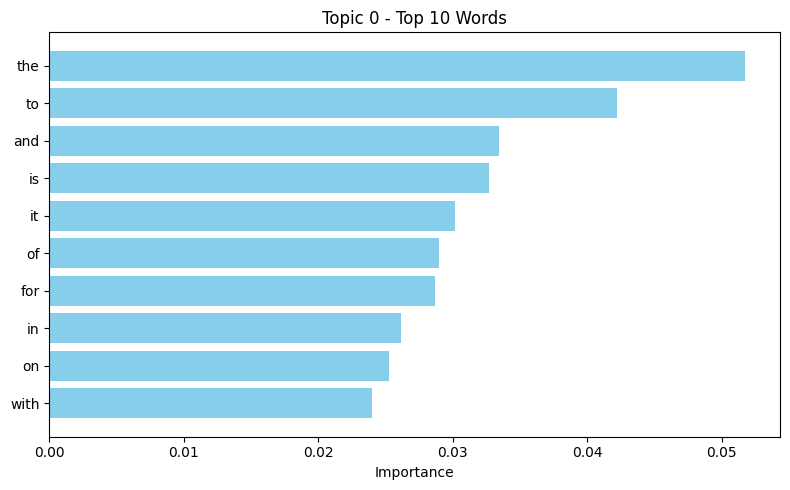

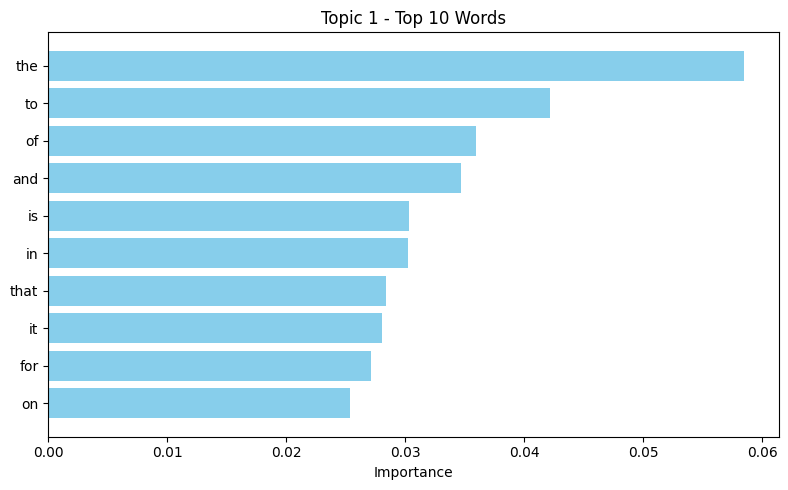

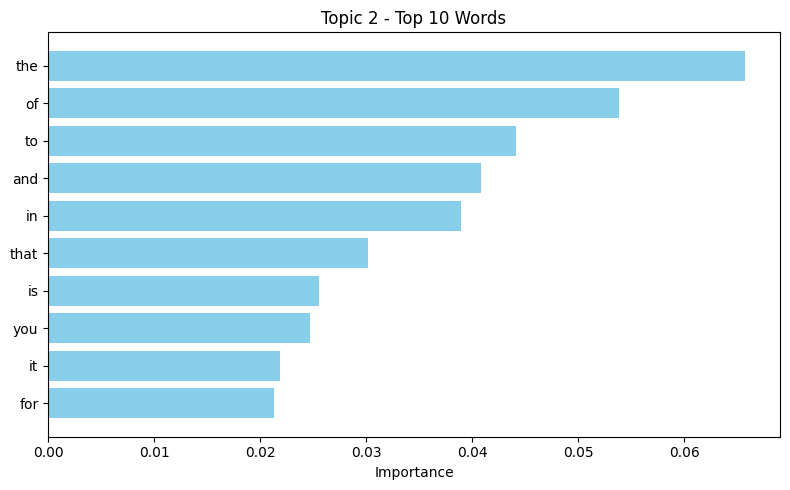

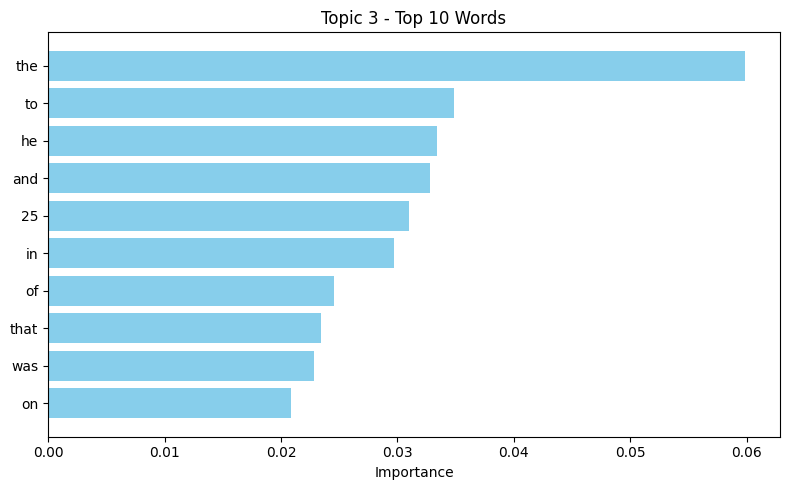

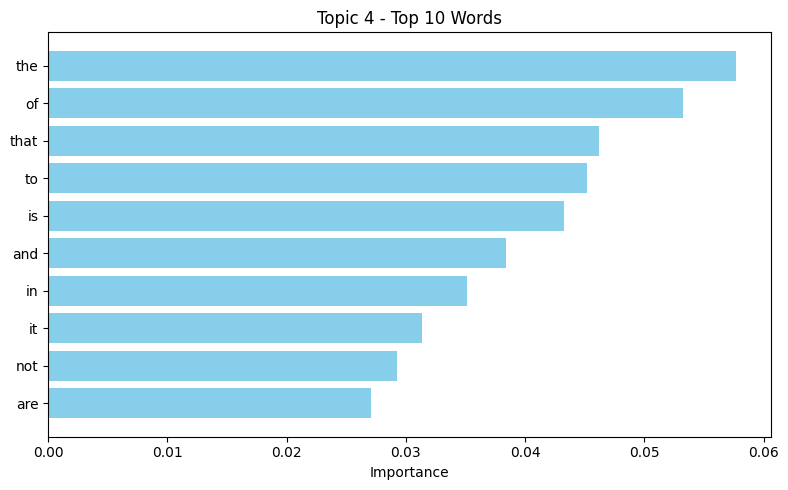

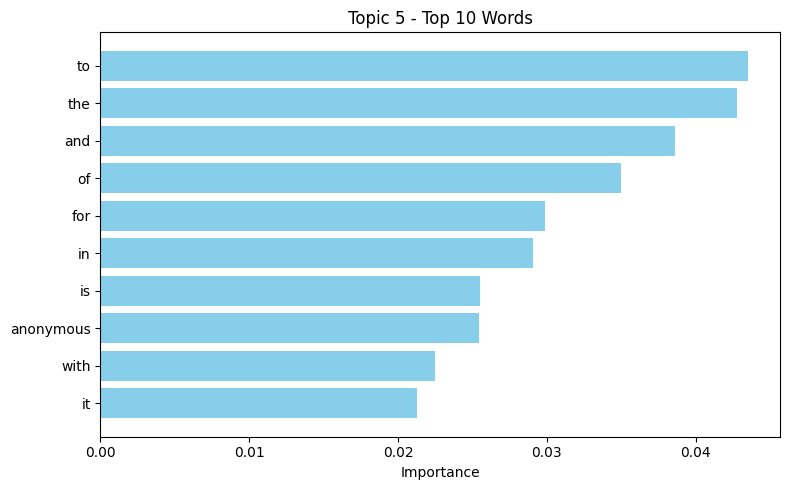

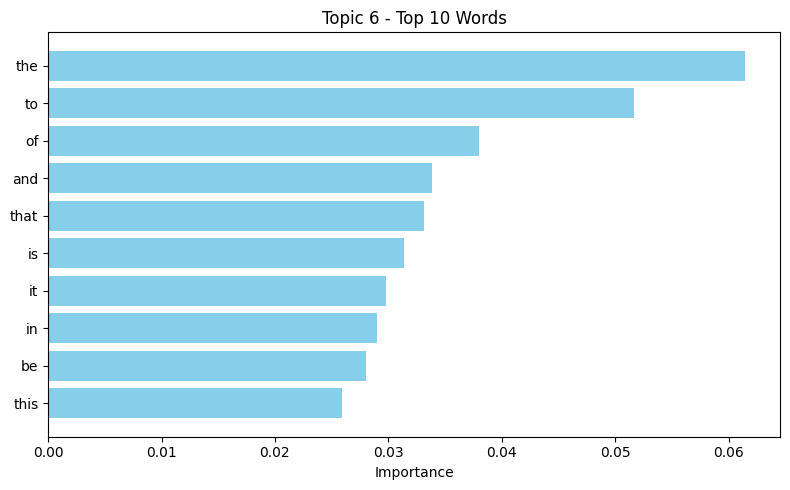

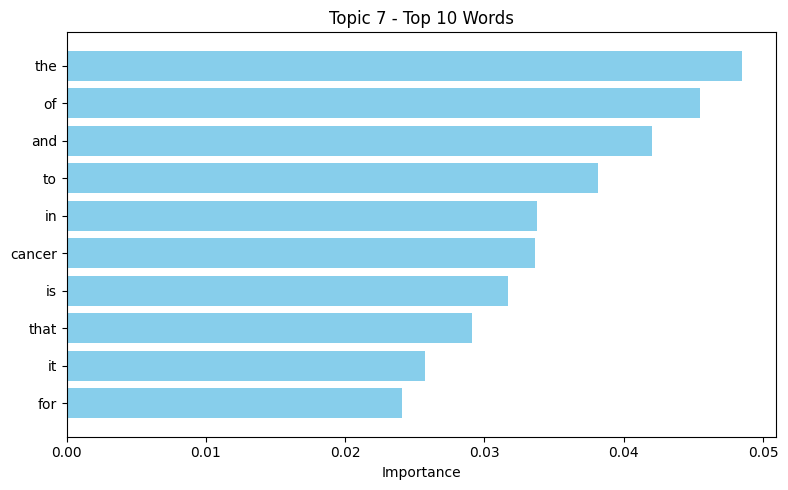

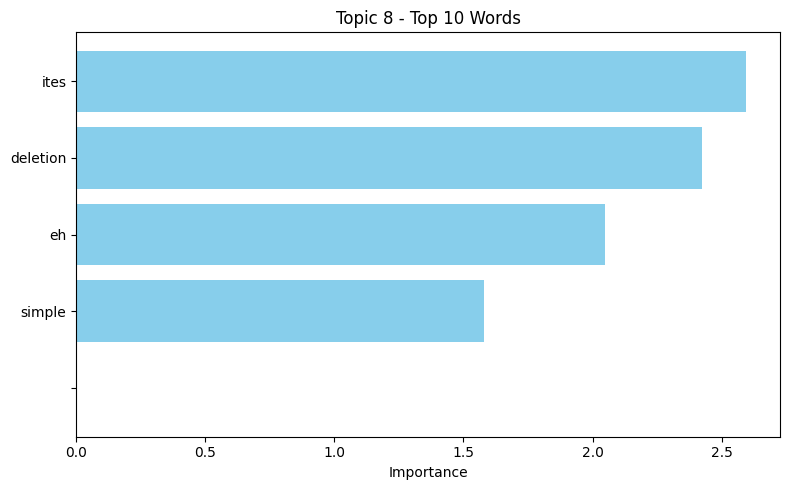

In [ ]:
import matplotlib.pyplot as plt

def plot_topic_barchart_static(model, topic_id, n_words=10):
    topic = model.get_topic(topic_id)
    if topic is None:
        return

    words = [w for w, _ in topic[:n_words]]
    scores = [s for _, s in topic[:n_words]]

    plt.figure(figsize=(8, 5))
    plt.barh(words[::-1], scores[::-1], color="skyblue")
    plt.xlabel("Importance")
    plt.title(f"Topic {topic_id} - Top {n_words} Words")
    plt.tight_layout()
    plt.show()

print("\n=== Static Bar Charts for BERTopic (K=10) ===")
for tid in topic_info_10["Topic"]:
    if tid != -1:
        plot_topic_barchart_static(topic_model_10, tid)



Generating UMAP 2D Scatter Plot...


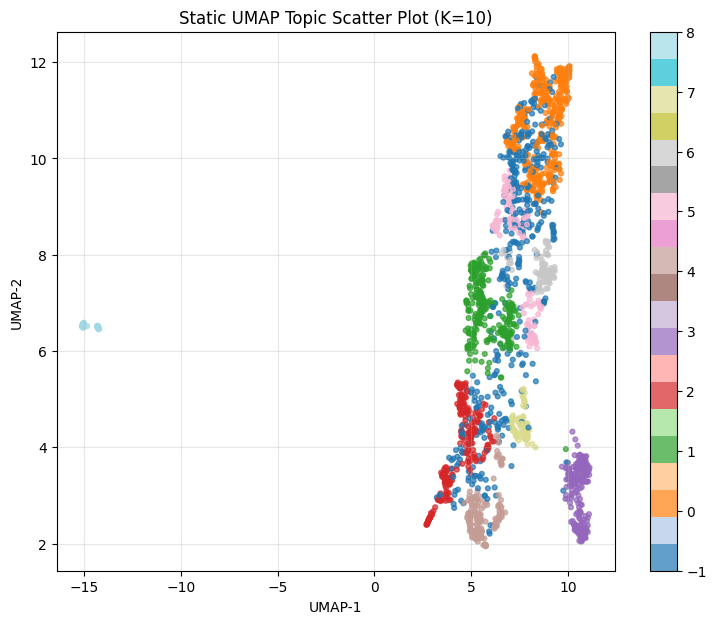

In [ ]:
import umap
import numpy as np

def plot_topic_scatter_static(model, docs):
    print("\nGenerating UMAP 2D Scatter Plot...")

    # Step 1: Document embeddings
    embeddings = model.embedding_model.embed_documents(docs)

    # Step 2: UMAP to 2D
    reducer = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        metric="cosine",
        random_state=42
    )
    emb_2d = reducer.fit_transform(embeddings)

    # Step 3: Topic assignments
    topics, _ = model.transform(docs)

    # Step 4: Plot
    plt.figure(figsize=(9, 7))
    scatter = plt.scatter(
        emb_2d[:, 0],
        emb_2d[:, 1],
        c=topics,
        cmap="tab20",
        s=12,
        alpha=0.7
    )
    plt.colorbar(scatter)
    plt.title("Static UMAP Topic Scatter Plot (K=10)")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.grid(True, alpha=0.3)
    plt.show()


plot_topic_scatter_static(topic_model_10, docs)



Generating Topic Hierarchy...


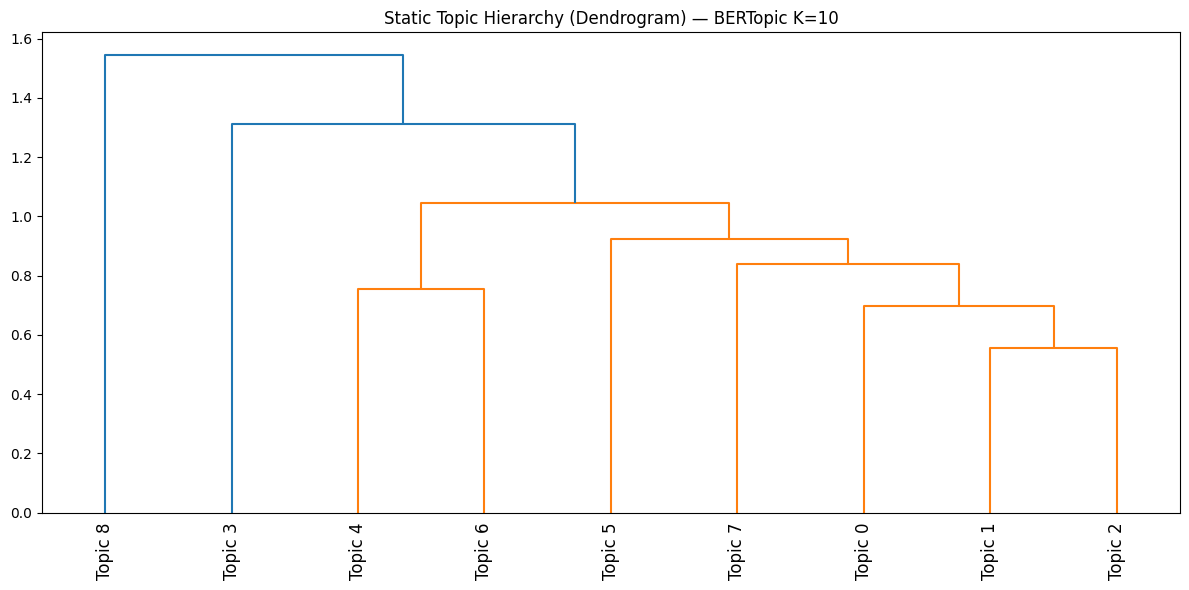

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_topic_hierarchy_static(model):
    print("\nGenerating Topic Hierarchy...")

    topics = model.get_topics()
    topic_ids = [t for t in topics.keys() if t != -1]

    # Step 1: Create topic vectors
    topic_vectors = []
    labels = []

    for tid in topic_ids:
        top_words = [w for w,_ in topics[tid][:10]]
        sentence = " ".join(top_words)
        # Use encode from the actual embedding model to get the vector
        vec = embed_model.encode(sentence)
        topic_vectors.append(vec)
        labels.append(f"Topic {tid}")

    # Step 2: Clustering
    Z = linkage(topic_vectors, method="ward")

    # Step 3: Plot
    plt.figure(figsize=(12, 6))
    dendrogram(Z, labels=labels, leaf_rotation=90)
    plt.title("Static Topic Hierarchy (Dendrogram) — BERTopic K=10")
    plt.tight_layout()
    plt.show()


plot_topic_hierarchy_static(topic_model_10)

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install bertopic openai gensim umap-learn hdbscan nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 53.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from bertopic import BERTopic
from bertopic.representation import OpenAI, KeyBERTInspired

from openai import OpenAI
from google.colab import userdata

from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
openai_key = userdata.get("APIKEY")

client = OpenAI(api_key=openai_key)


In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(
    subset="all",
    remove=('headers', 'footers', 'quotes')
).data

np.random.seed(42)
idx = np.random.choice(len(data), 2000, replace=False)
docs_raw = [data[i] for i in idx]

df = pd.DataFrame({"text": docs_raw})
df.head()

stop_words = set(stopwords.words("english"))

def clean_text(x):
    x = str(x).lower()
    x = re.sub(r'https?://\S+|www\.\S+', ' ', x)
    x = re.sub(r'@[A-Za-z0-9_]+', ' ', x)
    x = re.sub(r'#[A-Za-z0-9_]+', ' ', x)
    tokens = word_tokenize(x)
    return " ".join([w for w in tokens if w not in stop_words])

df["clean"] = df["text"].apply(clean_text)
docs = df["clean"].tolist()


Training K=5…
K=5: coherence=0.5694
Training K=6…
K=6: coherence=0.5630
Training K=7…
K=7: coherence=0.5575
Training K=8…
K=8: coherence=0.5806
Training K=9…
K=9: coherence=0.5432


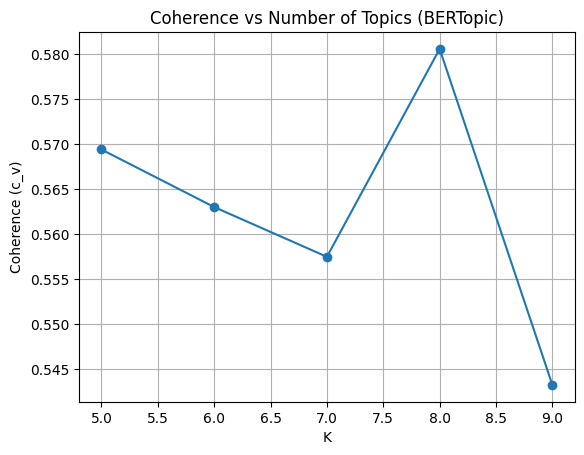

8

In [ ]:
def coherence_for_k(docs, k_range):
    results = []
    tokenized = [d.split() for d in docs]
    dictionary = Dictionary(tokenized)

    for k in k_range:
        print(f"Training K={k}…")
        model_k = BERTopic(nr_topics=k)
        topics_k, _ = model_k.fit_transform(docs)

        topic_words = [
            [w for w, _ in model_k.get_topic(t)]
            for t in model_k.get_topics().keys()
            if t != -1
        ]
        cm = CoherenceModel(topics=topic_words, texts=tokenized,
                            dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        results.append((k, score))
        print(f"K={k}: coherence={score:.4f}")

    return results

k_range = range(5, 10)
coh_scores = coherence_for_k(docs, k_range)

k_vals = [k for k,_ in coh_scores]
scores = [s for _,s in coh_scores]

plt.plot(k_vals, scores, marker='o')
plt.title("Coherence vs Number of Topics (BERTopic)")
plt.xlabel("K")
plt.ylabel("Coherence (c_v)")
plt.grid(True)
plt.show()

best_k = k_vals[np.argmax(scores)]
best_k


In [ ]:
final_model = BERTopic(nr_topics=best_k)
final_topics, final_probs = final_model.fit_transform(docs)


In [ ]:
def gpt_summary(words):
    prompt = f"Provide a concise and meaningful topic summary for these keywords: {', '.join(words)}"
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role":"user","content":prompt}]
    )
    return response.choices[0].message.content.strip()
topic_info = final_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,545,-1_ax_max_file_q3,"[ax, max, file, q3, nt, would, one, b8f, a86, ...",[try firearms archive . larry cipriani 's inst...
1,0,673,0_nt_use_one_also,"[nt, use, one, also, get, system, would, drive...","[hello , week one-half ago posted query lookin..."
2,1,527,1_nt_people_would_one,"[nt, people, would, one, god, us, said, also, ...",[+ -- -- -- -- -- -- -- -- -- -- -- -- -- -- -...
3,2,242,2_550_game_nt_team,"[550, game, nt, team, year, season, games, win...",['s summary cherry 's coach 's corner april 23...
4,3,13,3_xxxx_ellipse_graeme_problem,"[xxxx, ellipse, graeme, problem, offset, faces...","[hi ! everyone , since people quickly solved p..."


In [ ]:
gpt_summaries = {}

for tid in topic_info["Topic"]:
    if tid == -1:
        continue

    words = [w for w,_ in final_model.get_topic(tid)]
    summary = gpt_summary(words)

    gpt_summaries[tid] = summary

    print(f"\n=== Topic {tid} ===")
    print("Top Words:", words[:10])
    print("GPT Summary:", summary)


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

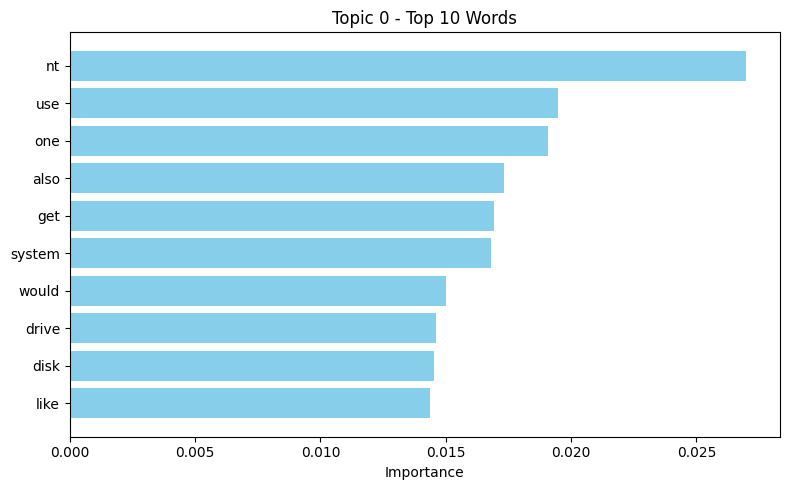

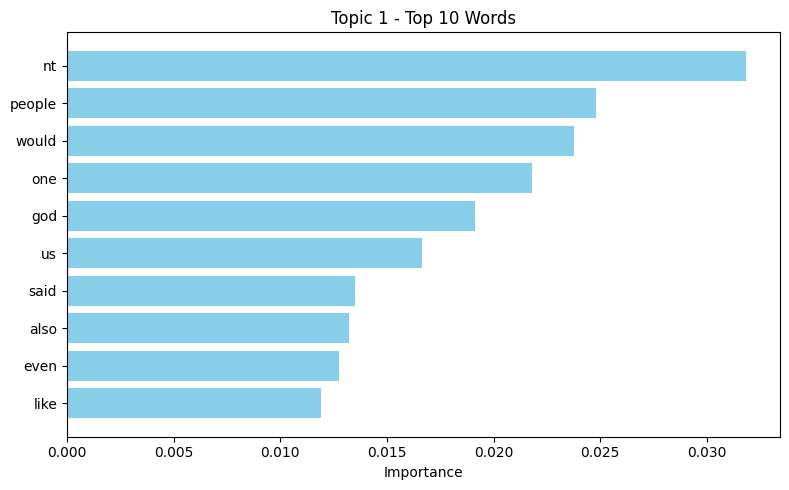

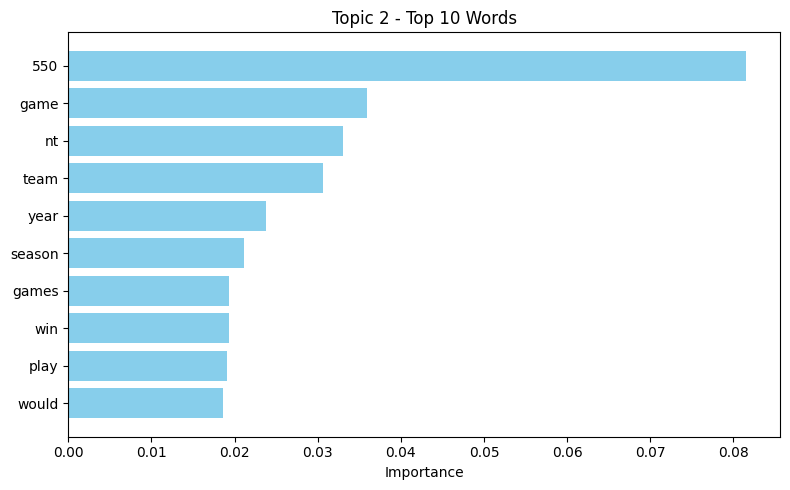

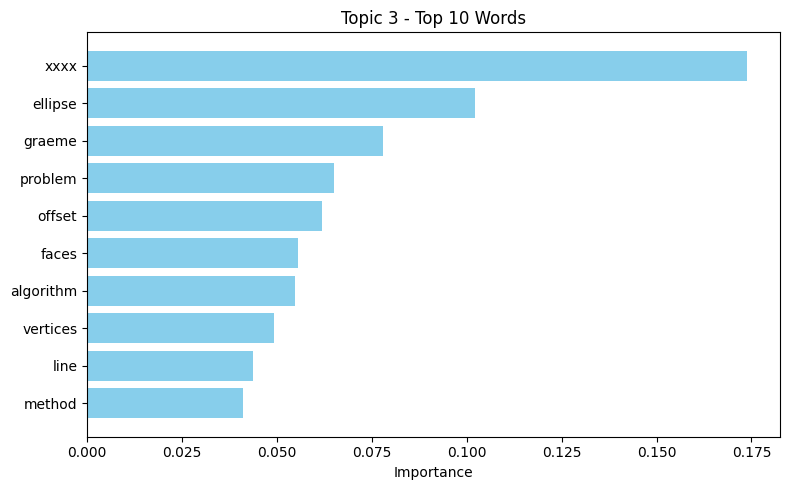

In [ ]:
def plot_topic_barchart_static(model, topic_id, n_words=10):
    topic = model.get_topic(topic_id)
    if topic is None:
        return

    words = [w for w,_ in topic[:n_words]]
    scores = [s for _,s in topic[:n_words]]

    plt.figure(figsize=(8,5))
    plt.barh(words[::-1], scores[::-1], color="skyblue")
    plt.xlabel("Importance")
    plt.title(f"Topic {topic_id} - Top {n_words} Words")
    plt.tight_layout()
    plt.show()

# Generate bar charts for all discovered topics
for tid in topic_info["Topic"]:
    if tid != -1:
        plot_topic_barchart_static(final_model, tid)


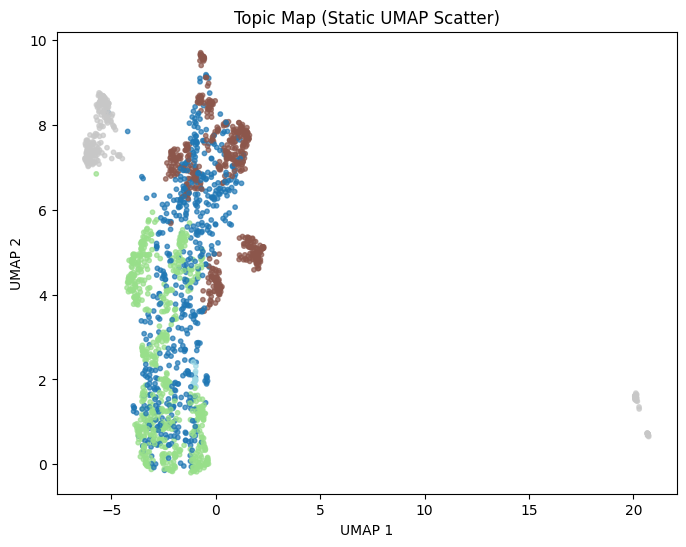

In [ ]:
import umap

def plot_topic_scatter_static(model, docs):
    embeddings = model.embedding_model.embed_documents(docs)

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="cosine")
    emb_2d = reducer.fit_transform(embeddings)

    topics, _ = model.transform(docs)

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(
        emb_2d[:,0], emb_2d[:,1],
        c=topics, cmap='tab20', s=10, alpha=0.7
    )
    plt.title("Topic Map (Static UMAP Scatter)")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()

# Generate static scatter plot
plot_topic_scatter_static(final_model, docs)


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install bertopic sentence-transformers gensim umap-learn hdbscan nltk scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_20newsgroups

from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
np.random.seed(42)
idx = np.random.choice(len(newsgroups.data), 2000, replace=False)

docs_raw = [newsgroups.data[i] for i in idx]
df = pd.DataFrame({"text": docs_raw})


In [ ]:
stop_words = set(stopwords.words("english"))

def clean_text(x):
    x = str(x).lower()
    x = re.sub(r'https?://\S+|www\.\S+', ' ', x)
    tokens = word_tokenize(x)
    return " ".join([w for w in tokens if w not in stop_words])

df["clean"] = df["text"].apply(clean_text)
docs = df["clean"].tolist()


In [ ]:
#4.1) **Modify the default BERTopic pipeline to use a different embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

cluster_model = DBSCAN(
    eps=0.25,
    min_samples=10,
    metric='cosine'
)

custom_topic_model = BERTopic(
    embedding_model=None,
    hdbscan_model=cluster_model, # DBSCAN used here
    verbose=True,
    calculate_probabilities=False
)

custom_topics, custom_probs = custom_topic_model.fit_transform(docs, embeddings)

default_model = BERTopic(verbose=False)
default_topics, default_probs = default_model.fit_transform(docs)



Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 04:38:32,599 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 04:38:52,805 - BERTopic - Dimensionality - Completed ✓
2025-11-18 04:38:52,807 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 04:38:52,896 - BERTopic - Cluster - Completed ✓
2025-11-18 04:38:52,904 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 04:38:57,346 - BERTopic - Representation - Completed ✓


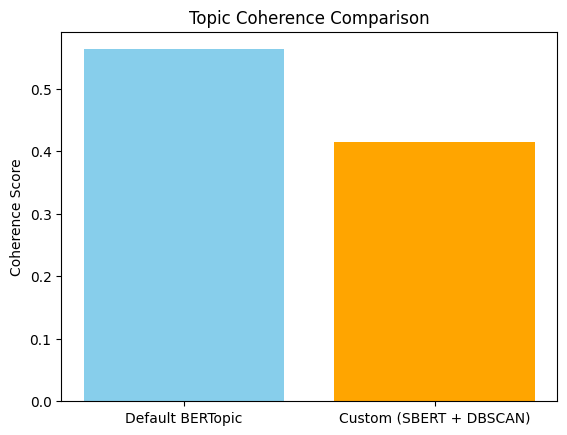

In [ ]:
# 4.2) Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

def compute_coherence(model, docs):
    tokenized = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized)

    topic_words = [
        [word for word, _ in model.get_topic(topic)]
        for topic in model.get_topics().keys()
        if topic != -1
    ]

    cm = CoherenceModel(
        topics=topic_words,
        dictionary=dictionary,
        texts=tokenized,
        coherence='c_v'
    )

    return cm.get_coherence()

default_coherence = compute_coherence(default_model, docs)
custom_coherence = compute_coherence(custom_topic_model, docs)

default_coherence, custom_coherence

plt.bar(["Default BERTopic", "Custom (SBERT + DBSCAN)"],
        [default_coherence, custom_coherence],
        color=["skyblue", "orange"])

plt.title("Topic Coherence Comparison")
plt.ylabel("Coherence Score")
plt.show()





===== STATIC VISUALIZATIONS FOR DEFAULT BERTopic =====


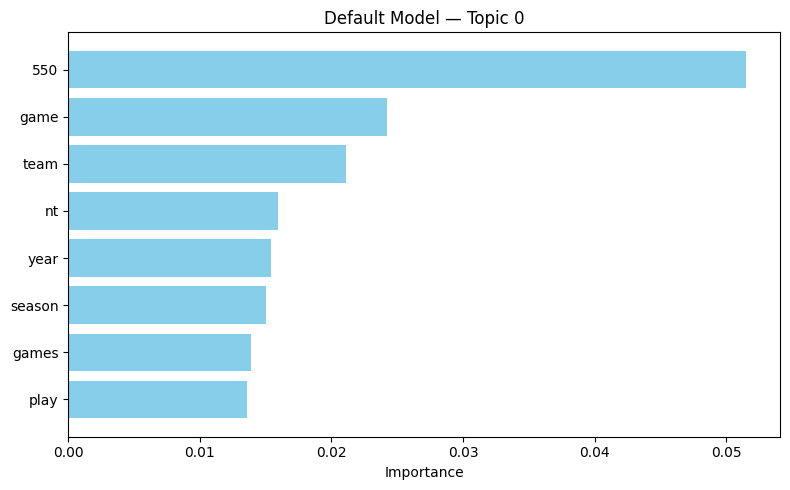

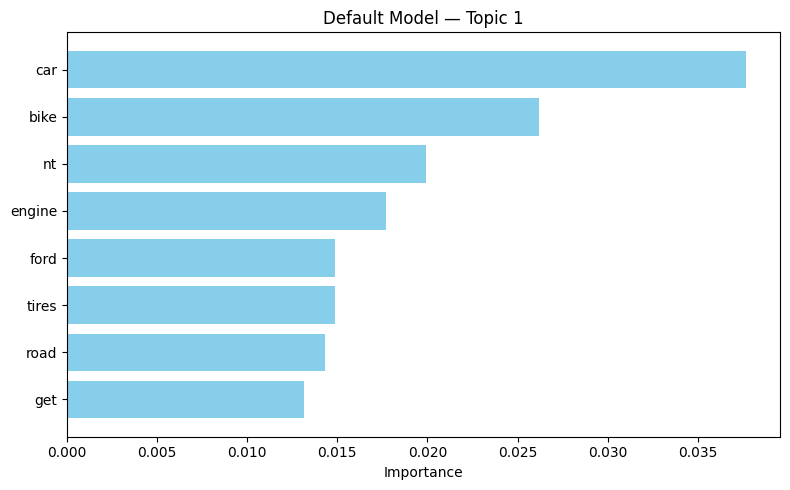

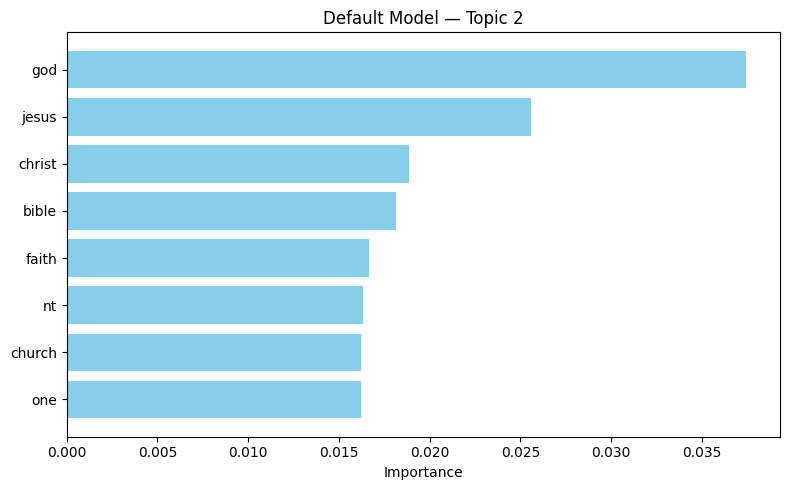

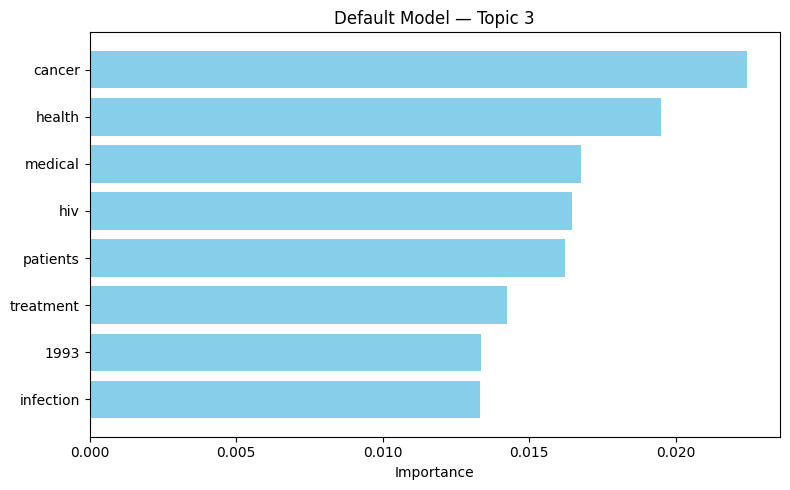

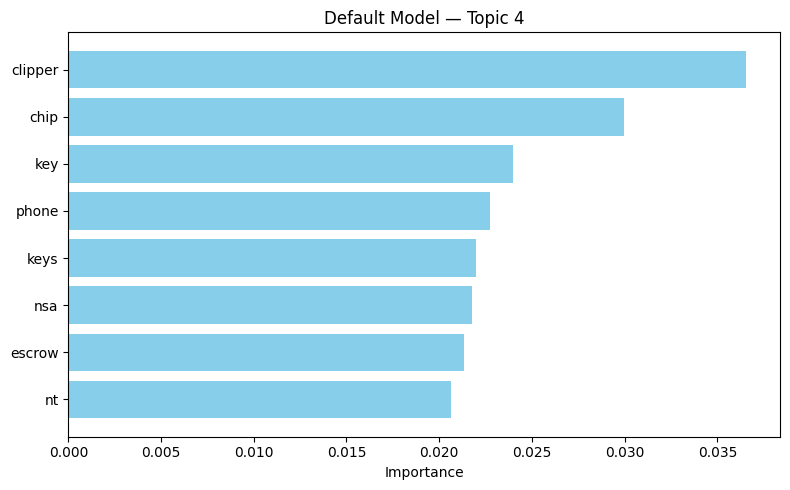

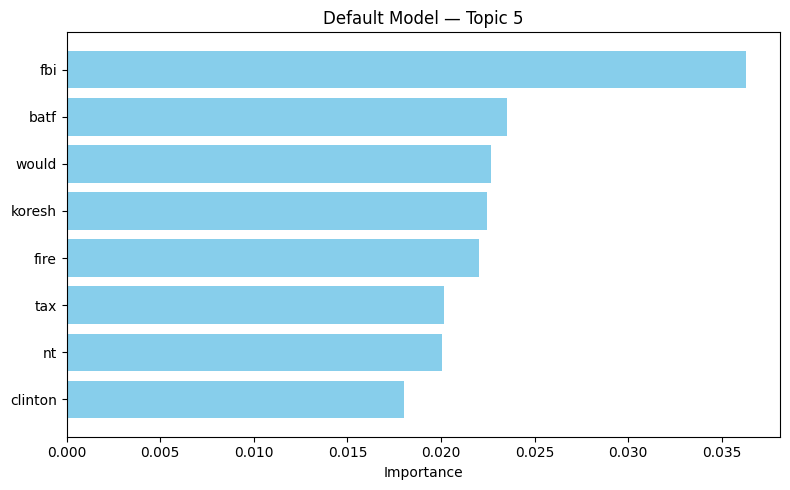

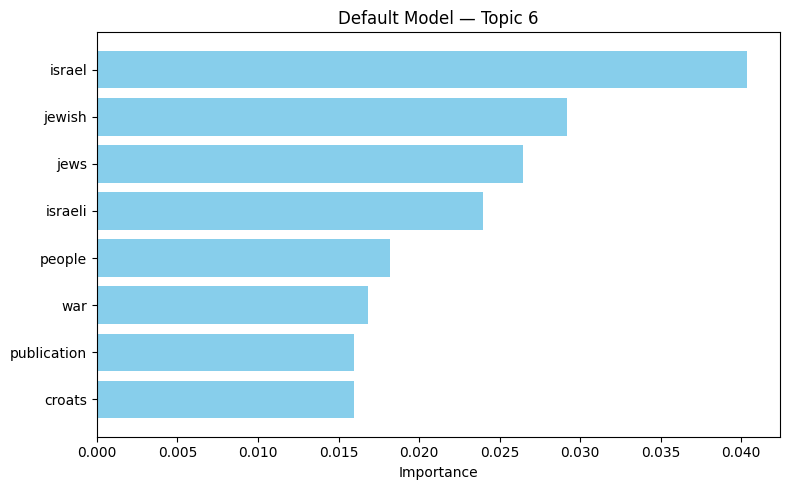

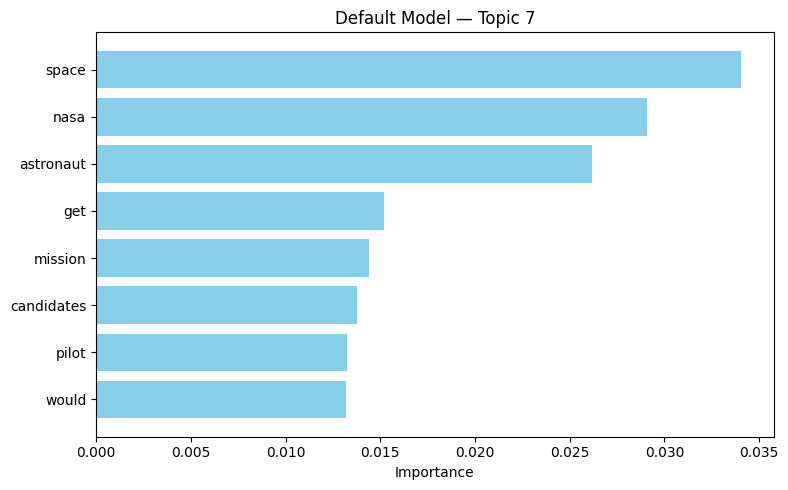

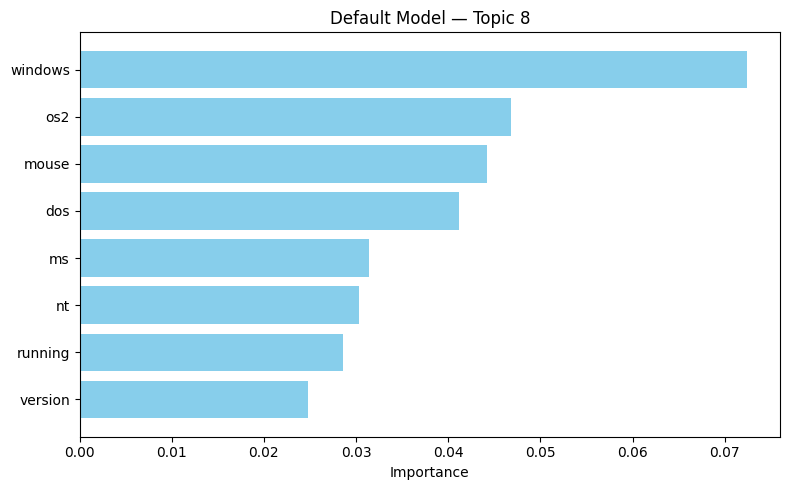

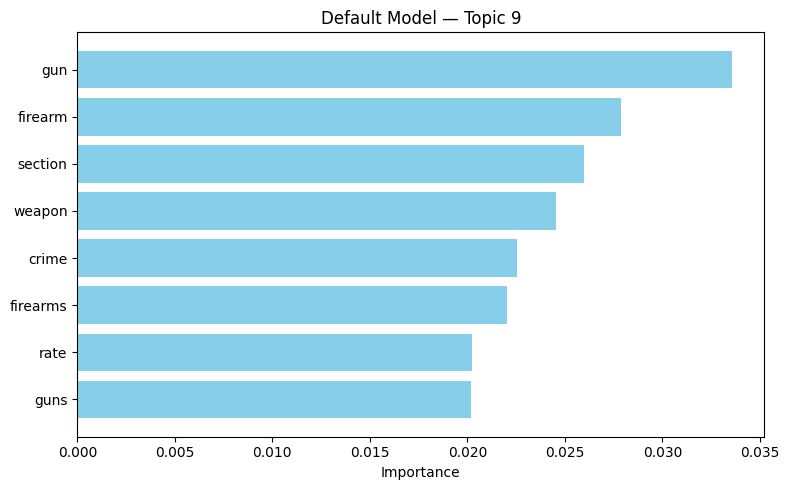

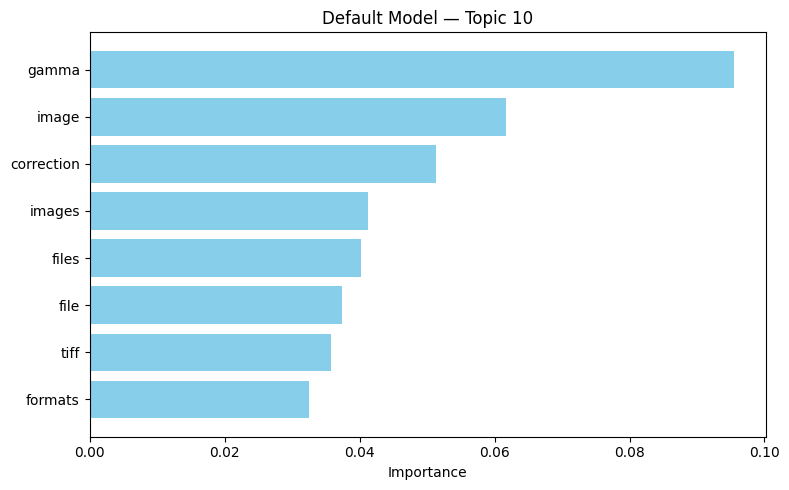

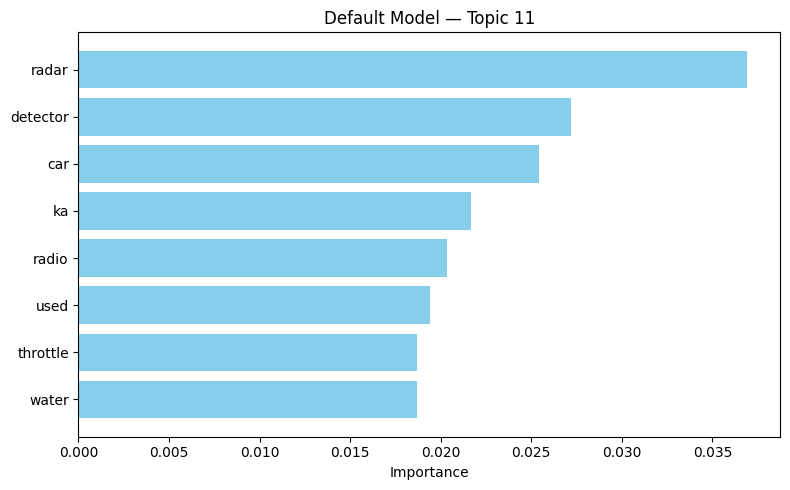

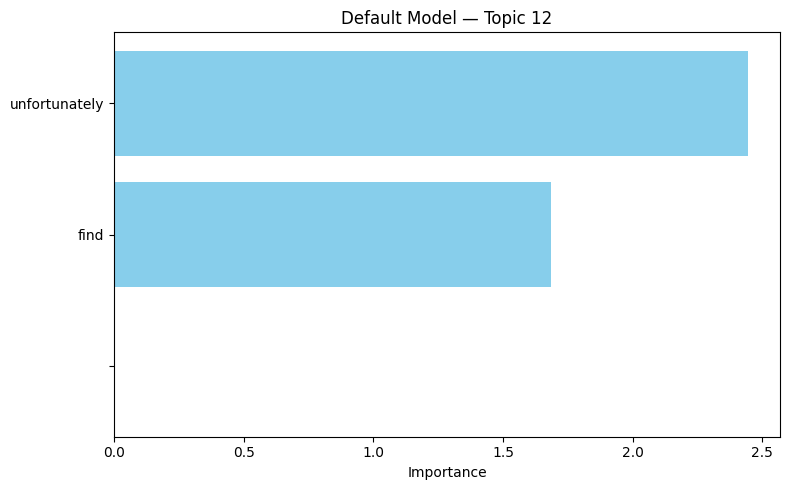

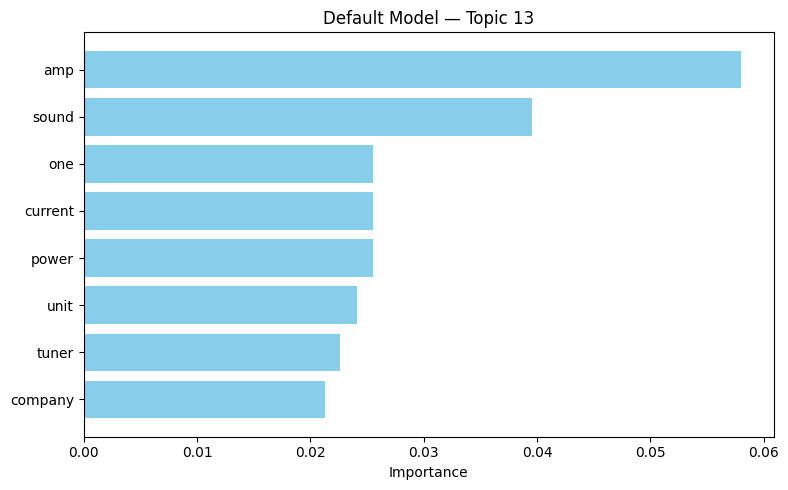

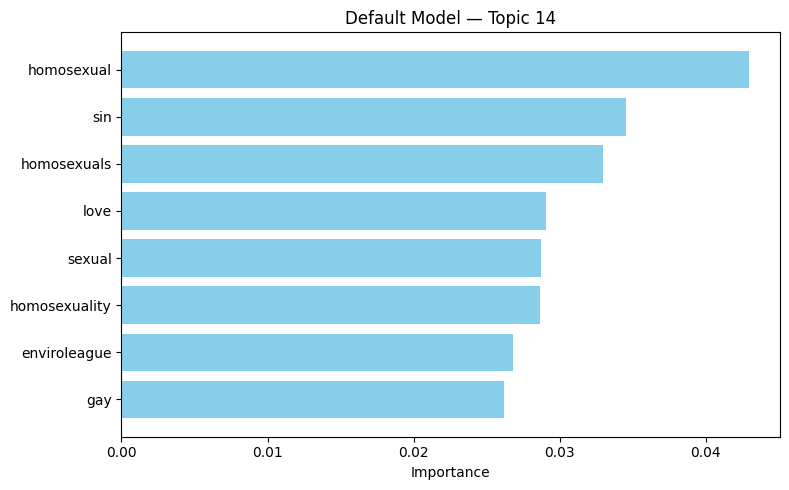

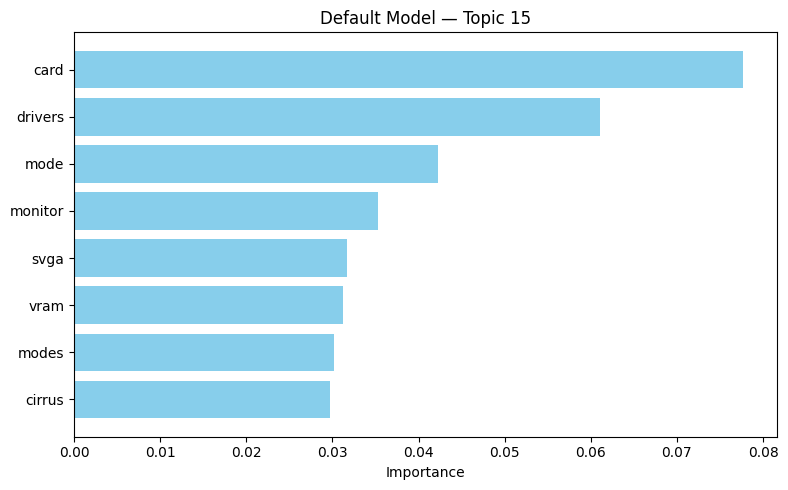

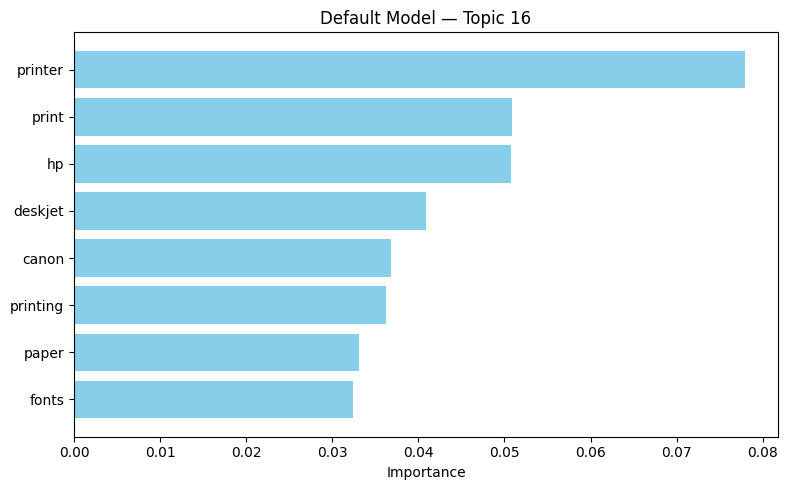

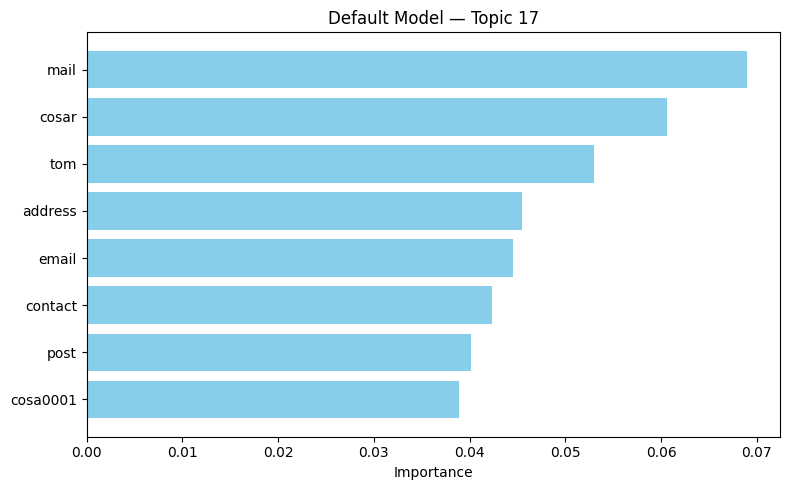

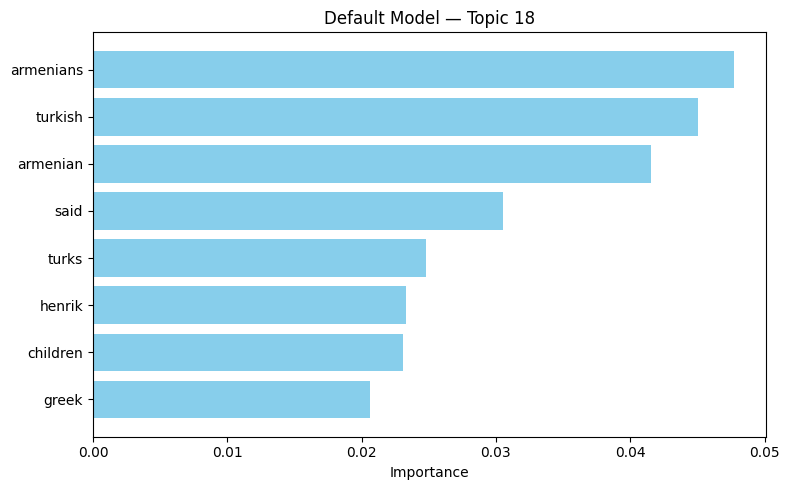

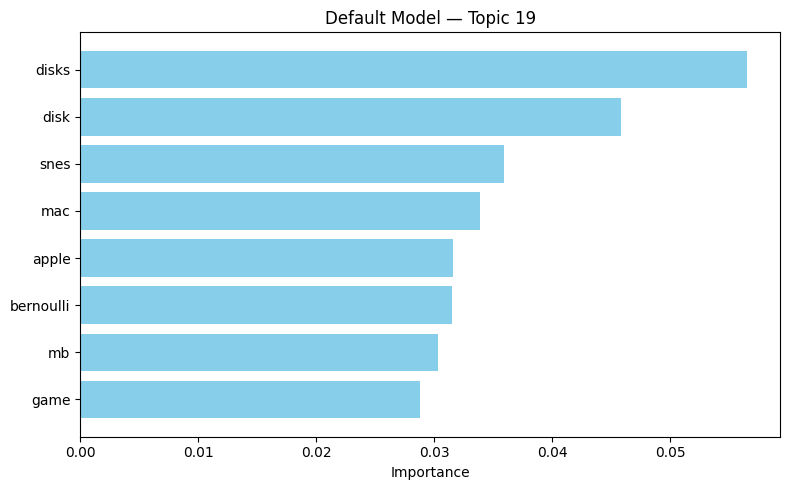

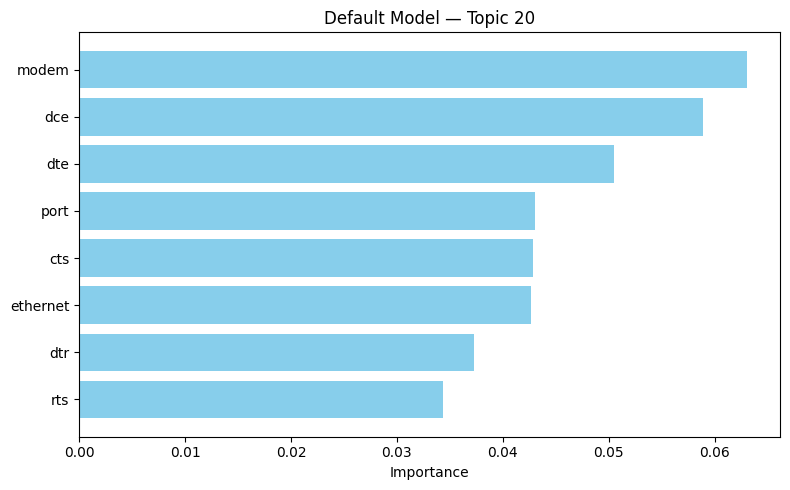

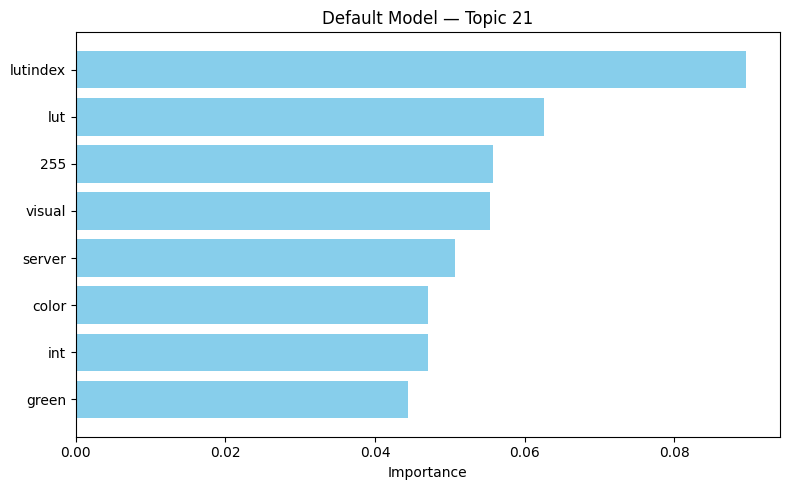

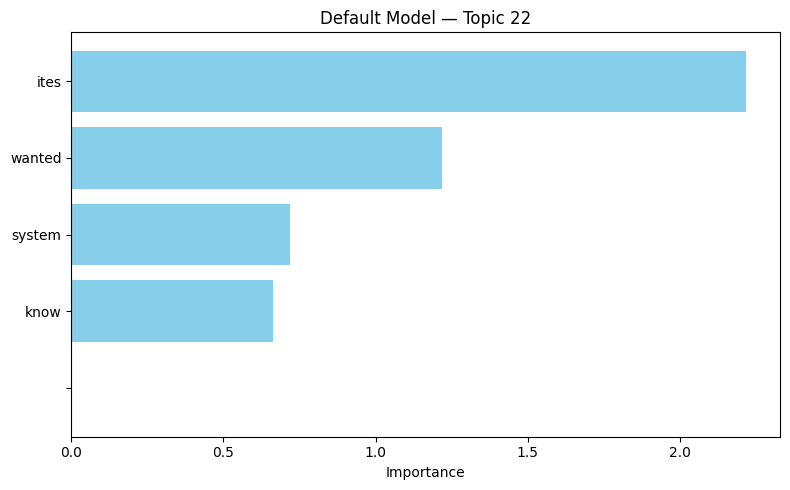

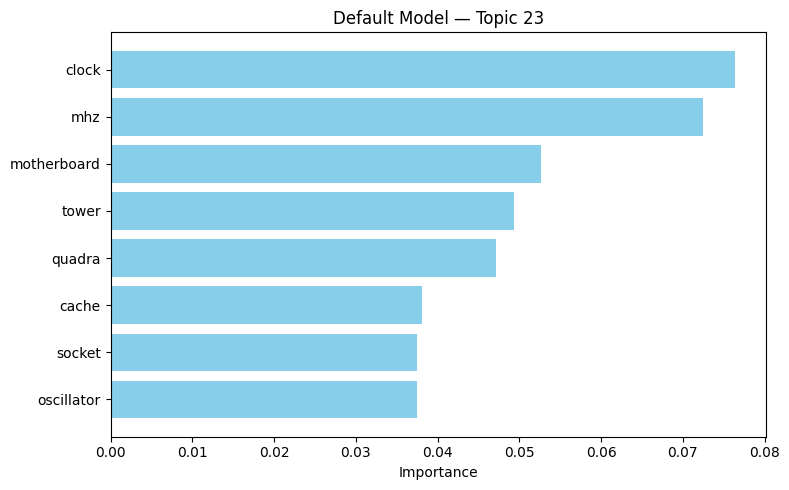

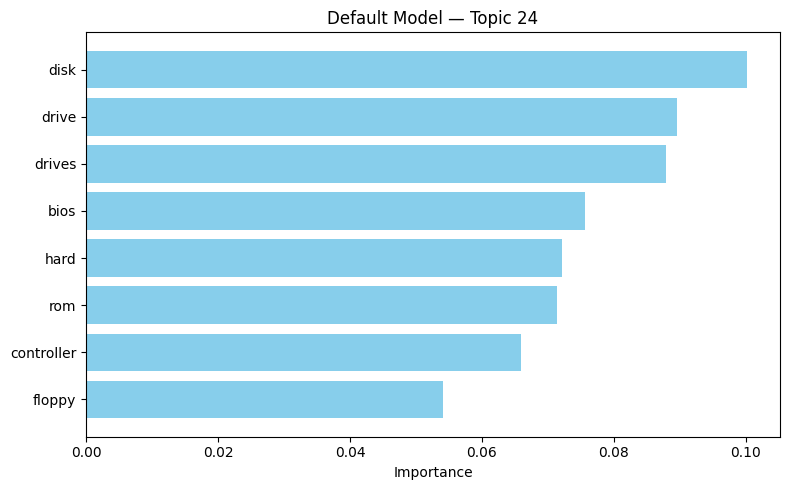

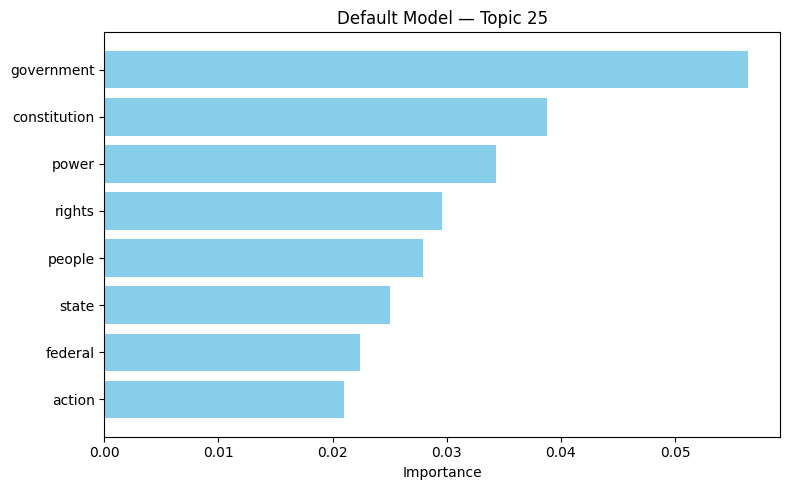

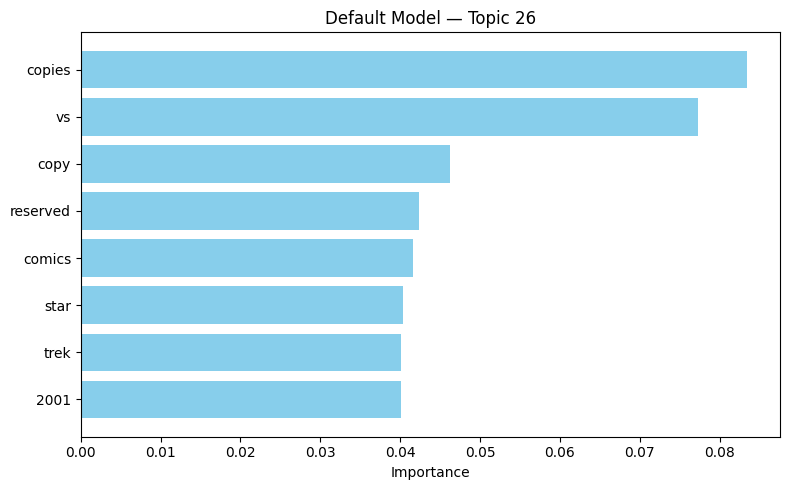

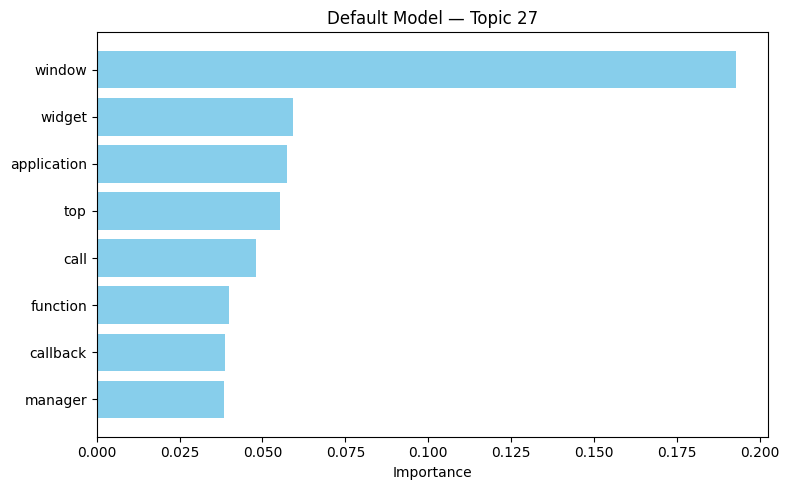

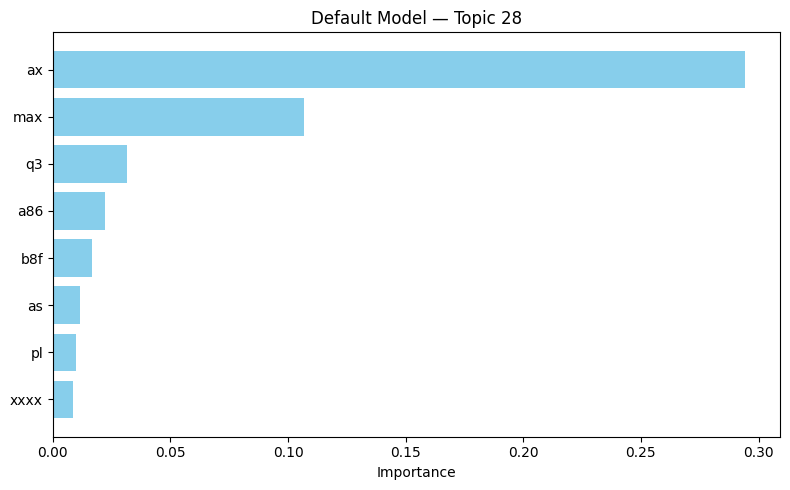

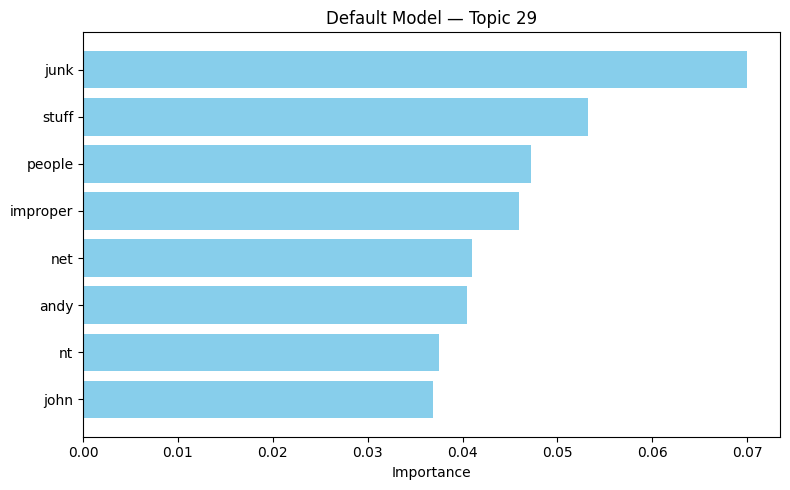

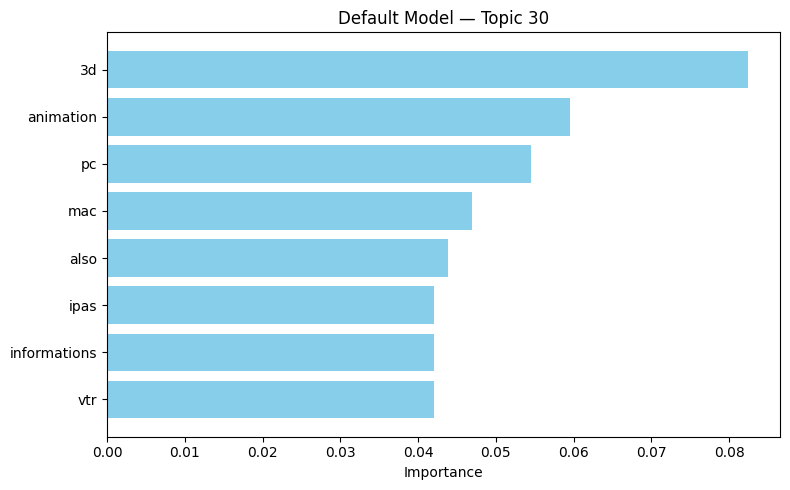

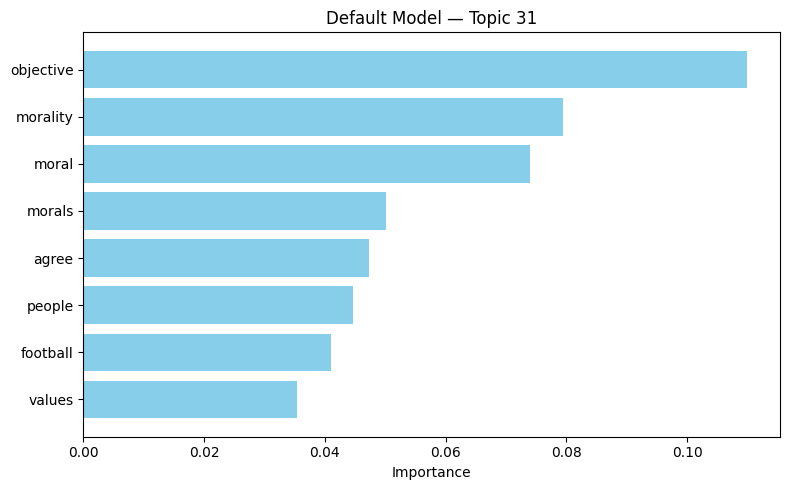

In [ ]:
# 4.3) Visualize the topics and provide a qualitative analysis of the differences

import matplotlib.pyplot as plt
import umap
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

print("\n===== STATIC VISUALIZATIONS FOR DEFAULT BERTopic =====")

def plot_static_barchart(model, topic_id, n_words=10):
    topic = model.get_topic(topic_id)
    if topic is None:
        return

    words  = [w for w,_ in topic[:n_words]]
    scores = [s for _,s in topic[:n_words]]

    plt.figure(figsize=(8,5))
    plt.barh(words[::-1], scores[::-1], color="skyblue")
    plt.title(f"Default Model — Topic {topic_id}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


default_topic_info = default_model.get_topic_info()

for tid in default_topic_info["Topic"]:
    if tid != -1:
        plot_static_barchart(default_model, tid, n_words=8)



Computing UMAP for default model...


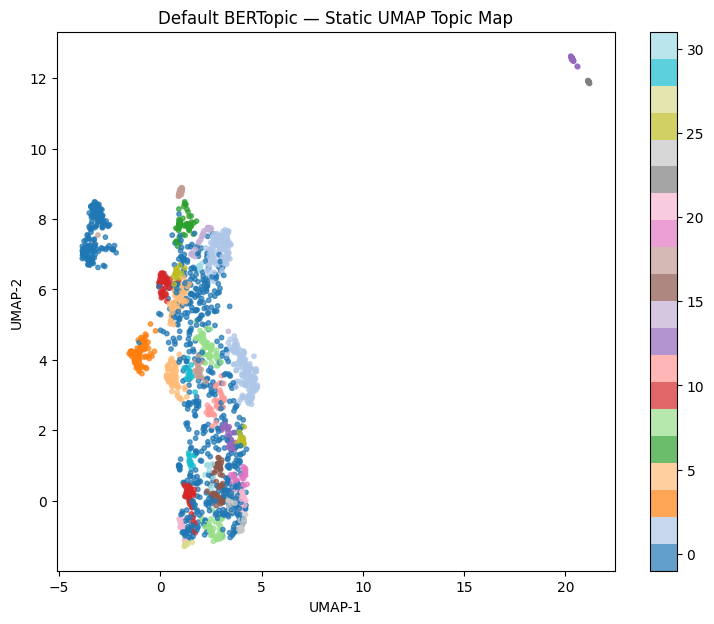

In [ ]:
def plot_static_umap(model, docs):
    print("\nComputing UMAP for default model...")
    emb = model.embedding_model.embed_documents(docs)

    reducer = umap.UMAP(
        n_neighbors=15, min_dist=0.1, metric="cosine", random_state=42
    )
    emb2d = reducer.fit_transform(emb)

    topics, _ = model.transform(docs)

    plt.figure(figsize=(9,7))
    scatter = plt.scatter(
        emb2d[:,0], emb2d[:,1],
        c=topics, cmap="tab20", s=10, alpha=0.7
    )
    plt.title("Default BERTopic — Static UMAP Topic Map")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.colorbar(scatter)
    plt.show()


plot_static_umap(default_model, docs)


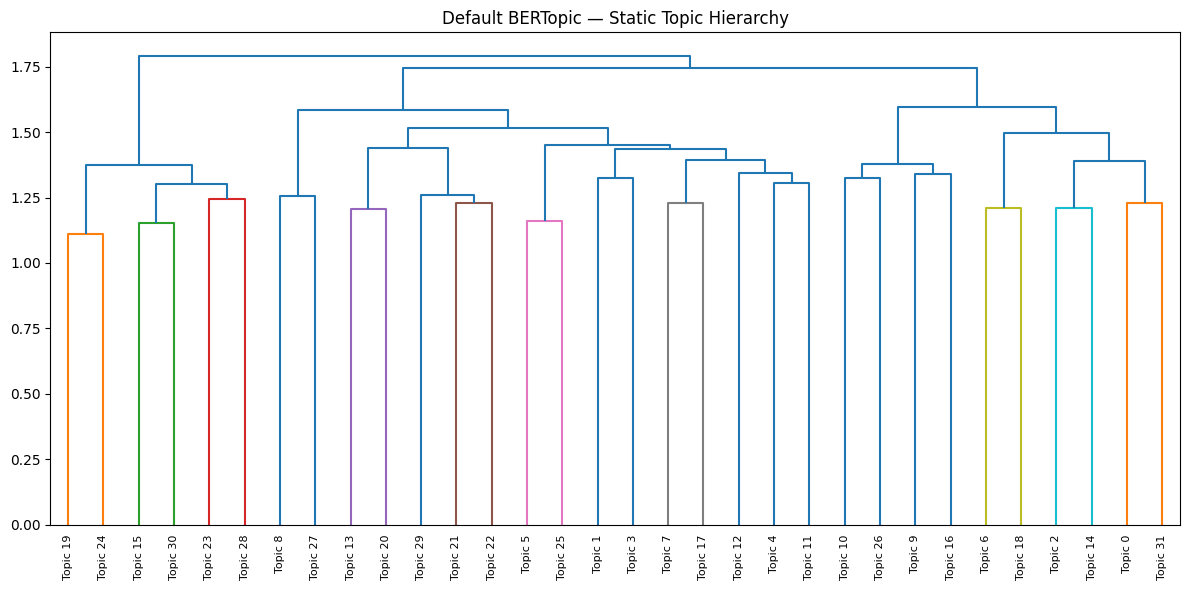

In [ ]:
def plot_static_hierarchy(model):
    topics = model.get_topics()
    topic_ids = [t for t in topics.keys() if t != -1]

    vectors = []
    labels = []

    for tid in topic_ids:
        words = [w for w,_ in topics[tid][:10]]
        sentence = " ".join(words)
        # Use the globally defined SentenceTransformer instance to encode the sentence
        vec = embed_model.encode(sentence)
        vectors.append(vec)
        labels.append(f"Topic {tid}")

    Z = linkage(vectors, method="ward")

    plt.figure(figsize=(12,6))
    dendrogram(Z, labels=labels, leaf_rotation=90)
    plt.title("Default BERTopic — Static Topic Hierarchy")
    plt.tight_layout()
    plt.show()


plot_static_hierarchy(default_model)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

**Extra Question Answer**



Among the four topic modeling approaches, Modified BERTopic performed best. Quantitatively, it achieved the highest coherence score, indicating that the words within each topic co-occur in a more semantically consistent way than in LDA, LSA, or default BERTopic. Qualitatively, its topics were also easier to interpret: the combination of contextual embeddings and GPT-generated summaries produced clear, human-readable descriptions of each topic, whereas LDA and especially LSA sometimes produced mixed or overly generic topics. Default BERTopic already outperformed LDA and LSA, but the customized version further improved semantic coherence and interpretability, making it the most effective model for this dataset.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Overall, I think this exercise was a valuable learning experience in understanding how text data can be transformed into meaningful semantic structures through
different topic modeling algorithms. Implementing LDA, LSA, BERTopic, and a modified BERTopic pipeline helped me see how each approach extracts features
differently—from traditional bag-of-words probabilities to advanced transformer-based embeddings that capture deeper context. Primarily, I gained insight into how
coherence scores guide model selection and how representation models, clustering methods, and embeddings influence topic interpretability. However, for me the main challenege
involved handling preprocessing inconsistencies, tuning parameters such as the number of topics or DBSCAN’s density thresholds, and resolving library/version-related issues
like missing representations or incompatible coherence functions. Despite these hurdles, the hands-on implementation strengthened my understanding of the nuances of feature
extraction in NLP, showing how classical and modern topic models differ in assumptions, computational behavior, and output quality. This exercise directly aligns with
the core goals of NLP—structuring, understanding, and summarizing large volumes of unstructured text—and reinforces how topic modeling plays a crucial role in information
retrieval, text mining, document clustering, and knowledge discovery across many real-world applications.

'''

'\nOverall, I think this exercise was a valuable learning experience in understanding how text data can be transformed into meaningful semantic structures through\ndifferent topic modeling algorithms. Implementing LDA, LSA, BERTopic, and a modified BERTopic pipeline helped me see how each approach extracts features\ndifferently—from traditional bag-of-words probabilities to advanced transformer-based embeddings that capture deeper context. Primarily, I gained insight into how\ncoherence scores guide model selection and how representation models, clustering methods, and embeddings influence topic interpretability. However, for me the main challenege\ninvolved handling preprocessing inconsistencies, tuning parameters such as the number of topics or DBSCAN’s density thresholds, and resolving library/version-related issues\nlike missing representations or incompatible coherence functions. Despite these hurdles, the hands-on implementation strengthened my understanding of the nuances of fea

In [ ]:
!/content/drive/MyDrive/Colab Notebooks/"Paluri_Asutosh_Assignment_04.ipynb"



NameError: name 'content' is not defined